## Lead Scoring Analysis

In [856]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [857]:
#set display options
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings("ignore")

In [1007]:
#load the data from
lead_df=pd.read_csv('Leads.csv', encoding='ISO-8859-1')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


### Basic Metadata and Exploration

In [859]:
print ('Shape of DF: ', lead_df.shape)
lead_df.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,0.95])

Shape of DF:  (9240, 37)


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,"9,240.00","9,240.00","9,103.00","9,240.00","9,103.00","5,022.00","5,022.00"
mean,"617,188.44",0.39,3.45,487.70,2.36,14.31,16.34
std,"23,406.00",0.49,4.85,548.02,2.16,1.39,1.81
min,"579,533.00",0.00,0.00,0.00,0.00,7.00,11.00
25%,"596,484.50",0.00,1.00,12.00,1.00,14.00,15.00
50%,"615,479.00",0.00,3.00,248.00,2.00,14.00,16.00
75%,"637,387.25",1.00,5.00,936.00,3.00,15.00,18.00
85%,"645,401.60",1.00,6.00,"1,233.15",4.00,16.00,18.00
90%,"650,506.10",1.00,7.00,"1,380.00",5.00,16.00,19.00
95%,"655,404.05",1.00,10.00,"1,562.00",6.00,17.00,20.00


__We have 9240 rows and 37 features. All numeric values are increasing gradually, and there does not seem to be outliers__

In [860]:
#Check column types
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [861]:
#Check for NULL values percentages
(round(lead_df.isnull().sum()/len(lead_df),2)*100).sort_values(ascending=False)

Lead Quality                                    52.00
Asymmetrique Profile Score                      46.00
Asymmetrique Activity Score                     46.00
Asymmetrique Profile Index                      46.00
Asymmetrique Activity Index                     46.00
Tags                                            36.00
What is your current occupation                 29.00
What matters most to you in choosing a course   29.00
Lead Profile                                    29.00
Country                                         27.00
How did you hear about X Education              24.00
Specialization                                  16.00
City                                            15.00
TotalVisits                                      1.00
Page Views Per Visit                             1.00
Last Activity                                    1.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                 

In [862]:
 #Check for rows with 5 or more columns having NULL values. We will have to analyse if these rows should be dropped
 # or if we can impute values   
print(lead_df[lead_df.isnull().sum(axis=1)>=5].shape) 
lead_df[lead_df.isnull().sum(axis=1)>=5].head()

(4143, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,NaN,NaN,01.High,02.Medium,17.00,15.00,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.00,71,2.00,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.00,14.00,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.00,58,4.00,...,No,NaN,Mumbai,02.Medium,02.Medium,13.00,16.00,No,No,Email Opened
16,3abb7c77-1634-4083-9a9f-861068220611,660540,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,NaN,NaN,01.High,02.Medium,17.00,15.00,No,No,Modified


__There are ~4143 rows (44.5%) with 5 or more columns missing a value__

In [863]:
#Variance - There are lots of features with Yes/No values. Lets analyse how is the spread of data
lead_df[['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',\
         'Newspaper','Digital Advertisement','Through Recommendations',\
         'Receive More Updates About Our Courses', 'A free copy of Mastering The Interview',\
         'Update me on Supply Chain Content','Get updates on DM Content']].apply(lambda x: x.value_counts())

,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,A free copy of Mastering The Interview,Update me on Supply Chain Content,Get updates on DM Content
No,8506,9238,9226,9238,9239,9239,9236,9233,"9,240.00",6352,"9,240.00","9,240.00"
Yes,734,2,14,2,1,1,4,7,nan,2888,nan,nan


In [864]:
#Check Data variance for Lead Source
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
testone                 1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64

In [865]:
#Check Data variance for Lead Origin
lead_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [866]:
#Check Data variance for Country (top 15)
lead_df['Country'].value_counts()[:15]

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
Nigeria                    4
Name: Country, dtype: int64

In [867]:
#Check Data variance for City
lead_df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

## Data Visualization

__Let's try to visualize the frequency of some features and try to identify which ones impact the conversion most__

- Lead Source
- Lead origin
- TotalVisits
- Total Time Spent on Website
- Page Views per Visit
- Last Activity
- Specialization
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendation
- Tags

In [868]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [869]:
#
# Create a function to plot univariate plots
#
'''
  Parameters:
     - df = DataFrame
     - feature = column/feature that we want to plot
     - hue = compare with another category
     - xlabel = x-axis label
     - ylabel = y-axis label
'''
def univ_plot(df, feature, hue=None, xlabel=None, ylabel=None, savefig=None):
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[feature].unique()) + 6 + 3*len(temp.unique())
    fig.set_size_inches(25 , 10)
    ax = sns.countplot(data = df, x=feature, order=df[feature].value_counts().index, hue = hue,palette='YlGnBu')        
     
    '''
    if len(temp.unique()) > 0:
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(lead_df))),(p.get_x()+0.05, p.get_height()+20)) 
           # ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
           #      ha='center', va='center', color='black', xytext=(0, 20),
           #      textcoords='offset points')
    else:
        exit
    '''
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(labelsize=16)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')    
    if savefig !='':
        plt.savefig(savefig+'.png', bbox_inches = 'tight')
    plt.show()
                

In [870]:
# Check the unique vaues for Lead Source
lead_df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [871]:
#From the list above, we see google and Google are 2 separate entities, which should be same. Correcting to Google
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')
lead_df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook', nan,
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

<Figure size 1800x720 with 0 Axes>

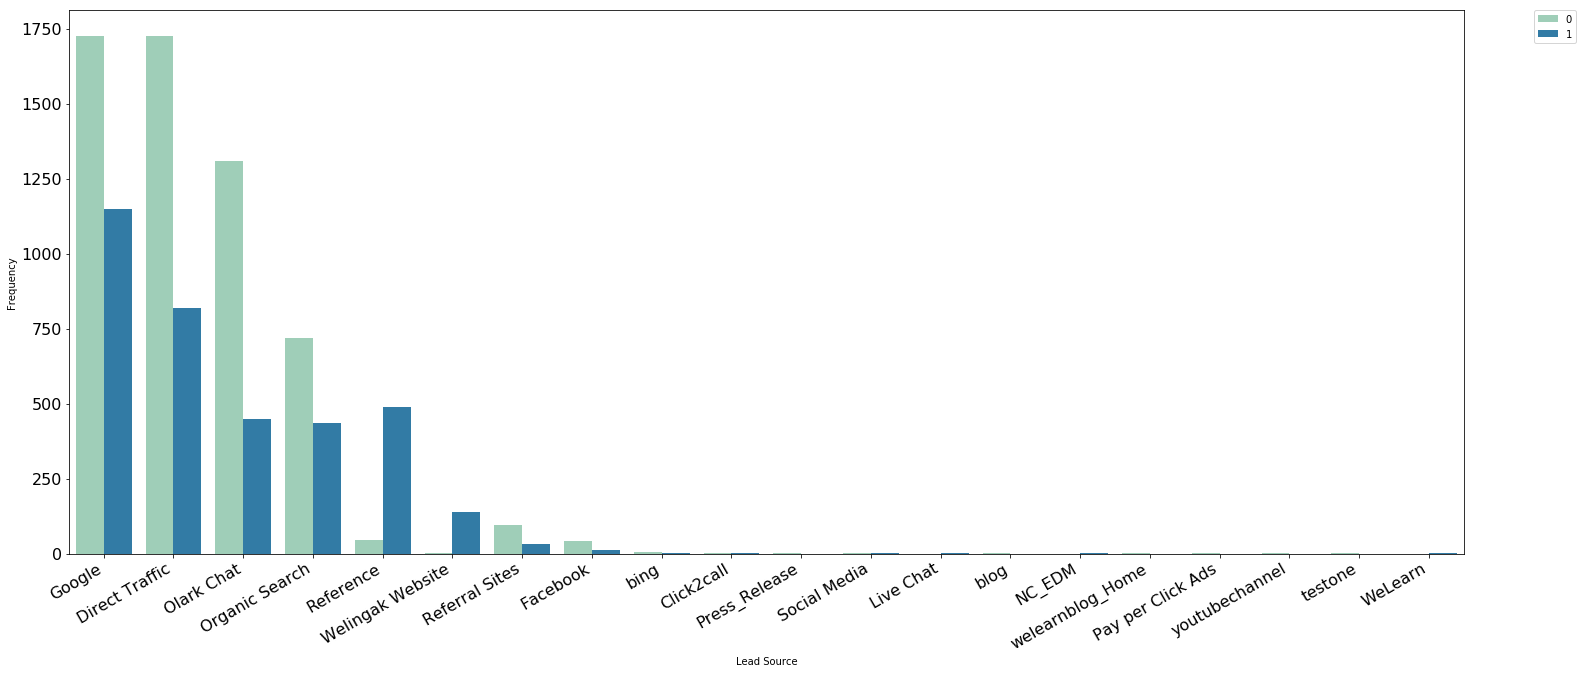

In [872]:
plt.figure(figsize=(25,10))

univ_plot(df=lead_df,feature='Lead Source',hue='Converted',xlabel='Lead Source', ylabel='Frequency', savefig='LeadSource')

From the plot above, we can see that majority of the data is contributed by 6-7 Lead Sources and the rest are very miniscule. 
These can be clubbed together into 1 category for ease of analysis.
Categories that can be merged together as 'Others' are:
Social Media, Press_Release, Live Chat, NC_EDM, blog, testone, Pay per Click Ads, youtubechannel, welearnblog_Home, WeLearn.

In [873]:
#lead_df['Lead Source']=
x=dict.fromkeys(['Social Media','Press_Release','Live Chat','NC_EDM','blog','testone','Pay per Click Ads','youtubechannel','welearnblog_Home','WeLearn'],'Others')
lead_df['Lead Source'] = lead_df[['Lead Source']].replace(x)

In [874]:
#Check Data variance for Lead Source
lead_df['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                13
bing                   6
Click2call             4
Name: Lead Source, dtype: int64

<Figure size 1800x720 with 0 Axes>

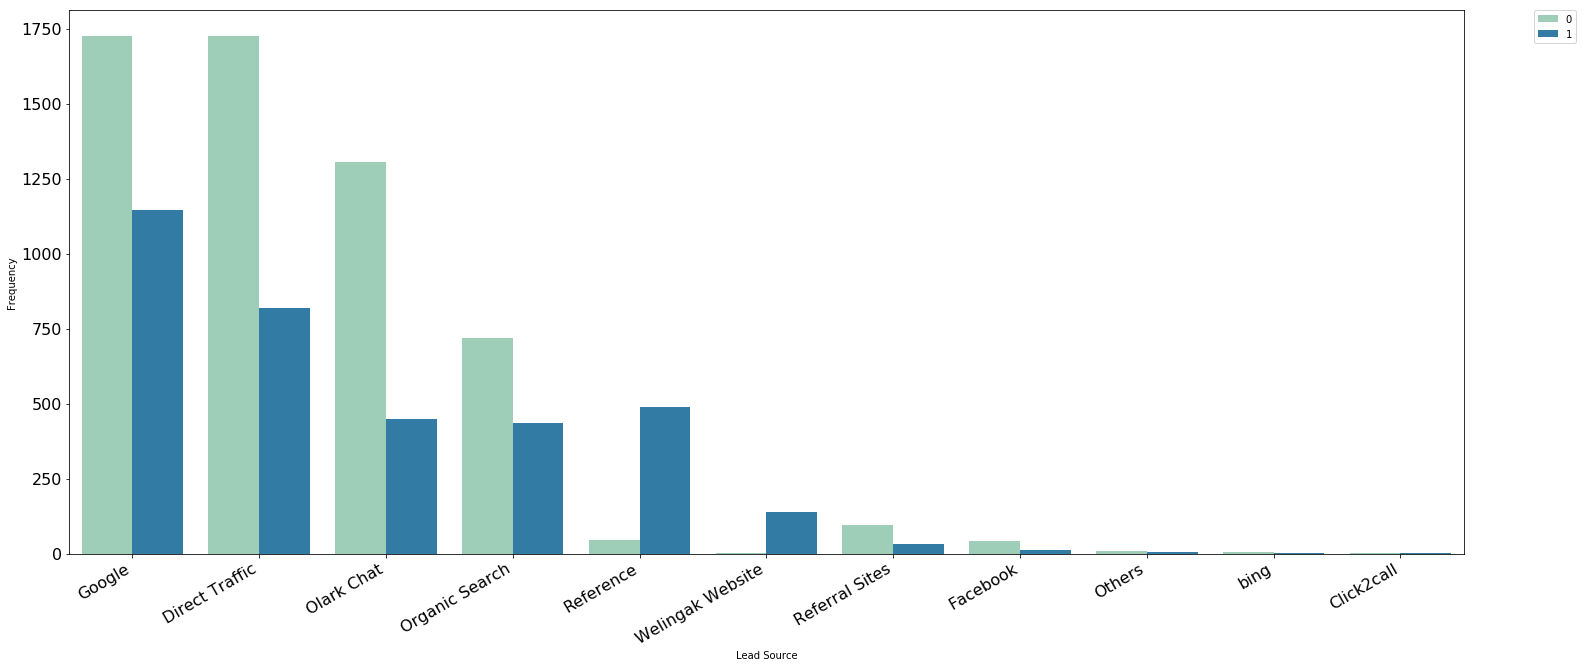

In [875]:
#Plotting with modified data
plt.figure(figsize=(25,10))
univ_plot(df=lead_df,feature='Lead Source',hue='Converted',xlabel='Lead Source', ylabel='Frequency', savefig='LeadSource')

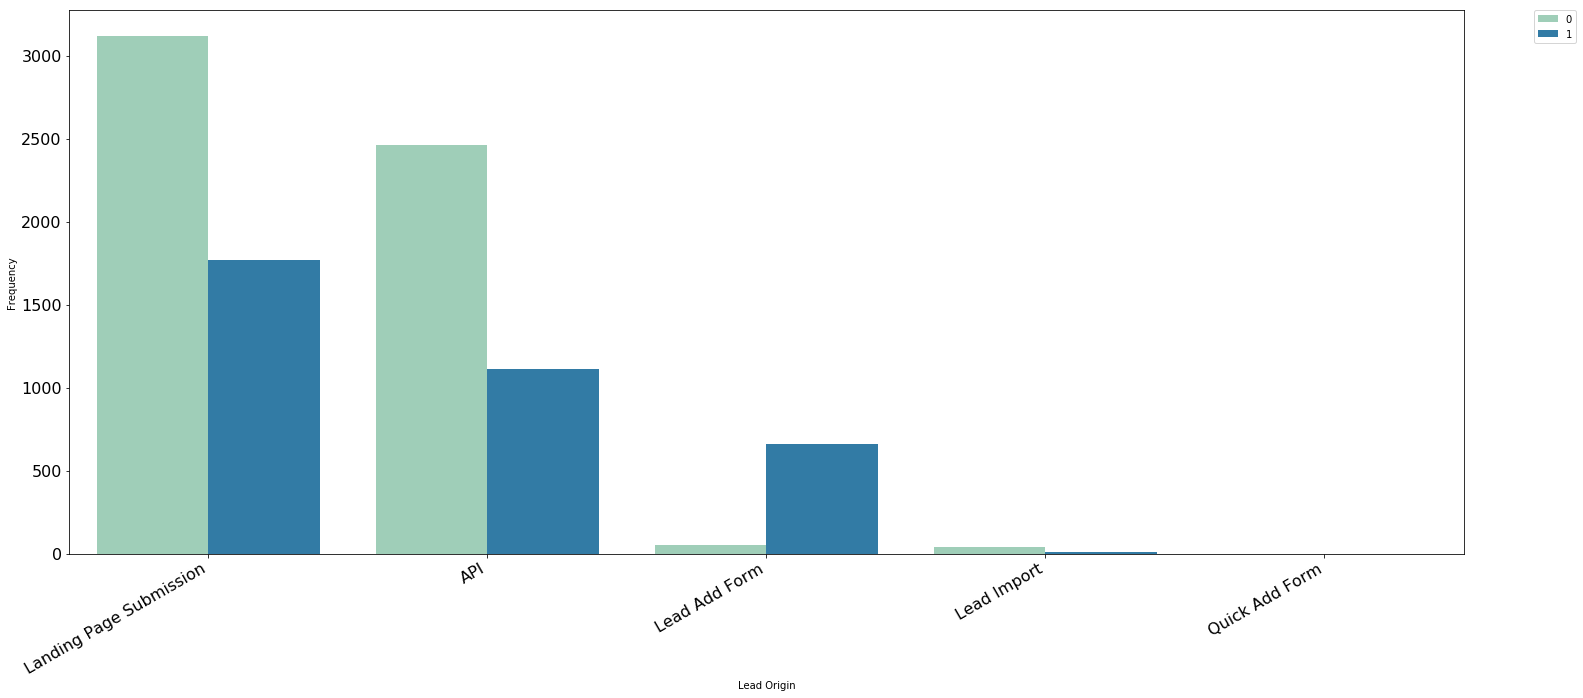

In [876]:
# Plot Lead Origin
univ_plot(df=lead_df,feature='Lead Origin',hue='Converted',xlabel='Lead Origin', ylabel='Frequency', savefig='LeadOrigin')

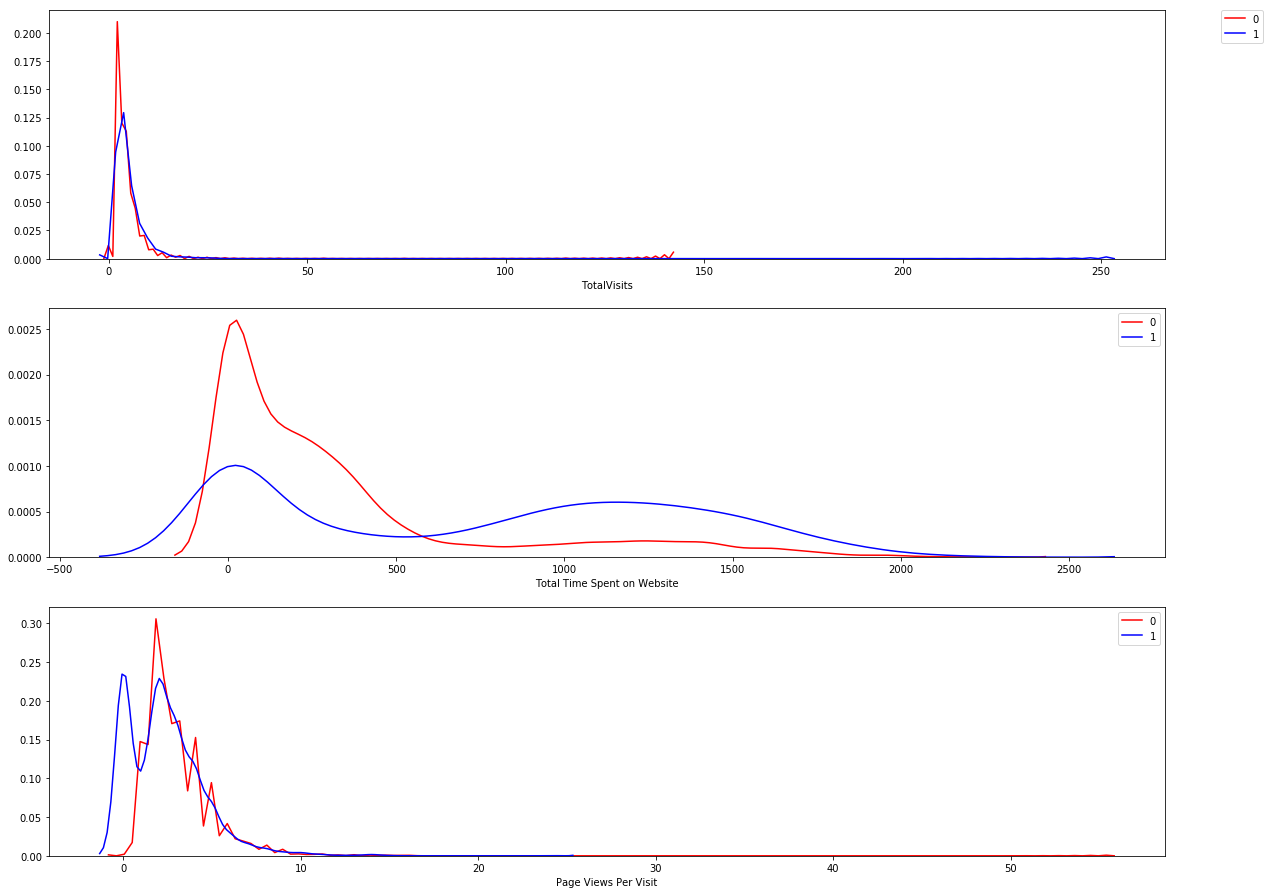

In [877]:
#Plot Page Views Per Visit
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
g1 = sns.distplot(lead_df[lead_df['Converted']==0]['TotalVisits'],hist=False, label='0', color='r')
g2 = sns.distplot(lead_df[lead_df['Converted']==1]['TotalVisits'],hist=False,  label='1', color='b')
#plt.legend(('Converted=0','Converted=1'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2 , borderaxespad=0.)

plt.subplots_adjust(top=1.3)
plt.subplot(3,1,2)
g1 = sns.distplot(lead_df[lead_df['Converted']==0]['Total Time Spent on Website'],hist=False, label='0', color='r')
g2 = sns.distplot(lead_df[lead_df['Converted']==1]['Total Time Spent on Website'],hist=False,  label='1', color='b')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2 , borderaxespad=0.)

plt.subplots_adjust(top=1.3)
plt.subplot(3,1,3)
g1 = sns.distplot(lead_df[lead_df['Converted']==0]['Page Views Per Visit'],hist=False, label='0', color='r')
g2 = sns.distplot(lead_df[lead_df['Converted']==1]['Page Views Per Visit'],hist=False,  label='1', color='b')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2 , borderaxespad=0.)

plt.savefig('PageMetrics.png',bbox_inches='tight')
plt.show()

In [878]:
#Plot TotalVisits
#plt.figure(figsize=(20,10))
#g1 = sns.distplot(lead_df[lead_df['Converted']==0]['TotalVisits'],hist=False, label='0', color='r')
#g2 = sns.distplot(lead_df[lead_df['Converted']==1]['TotalVisits'],hist=False,  label='1', color='b')
#plt.legend(('Converted=0','Converted=1'))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2 , borderaxespad=0.)

In [879]:
#Plot Total Time Spent on Website
#plt.figure(figsize=(20,10))
#g1 = sns.distplot(lead_df[lead_df['Converted']==0]['Total Time Spent on Website'],hist=False, label='0', color='r')
#g2 = sns.distplot(lead_df[lead_df['Converted']==1]['Total Time Spent on Website'],hist=False,  label='1', color='b')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2 , borderaxespad=0.)

In [880]:
#Plot Page Views Per Visit
#plt.figure(figsize=(20,10))
#g1 = sns.distplot(lead_df[lead_df['Converted']==0]['Page Views Per Visit'],hist=False, label='0', color='r')
#g2 = sns.distplot(lead_df[lead_df['Converted']==1]['Page Views Per Visit'],hist=False,  label='1', color='b')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2 , borderaxespad=0.)

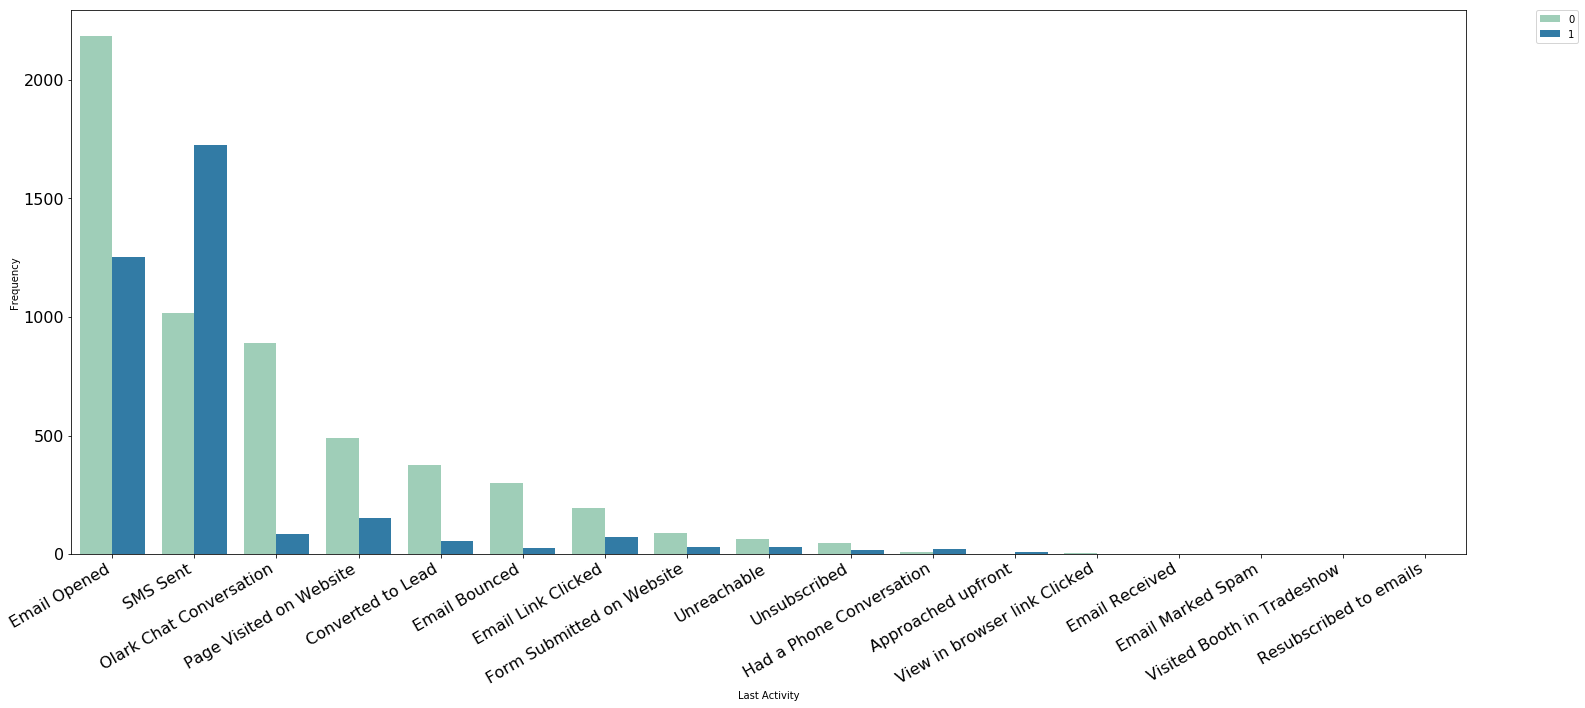

In [881]:
#Last Activity
univ_plot(df=lead_df,feature='Last Activity',hue='Converted',xlabel='Last Activity', ylabel='Frequency', savefig='LastActivity')

__From the plot of Last Activity, we understand that the most effective way to convert a lead is communicating via SMS, followed by emails__

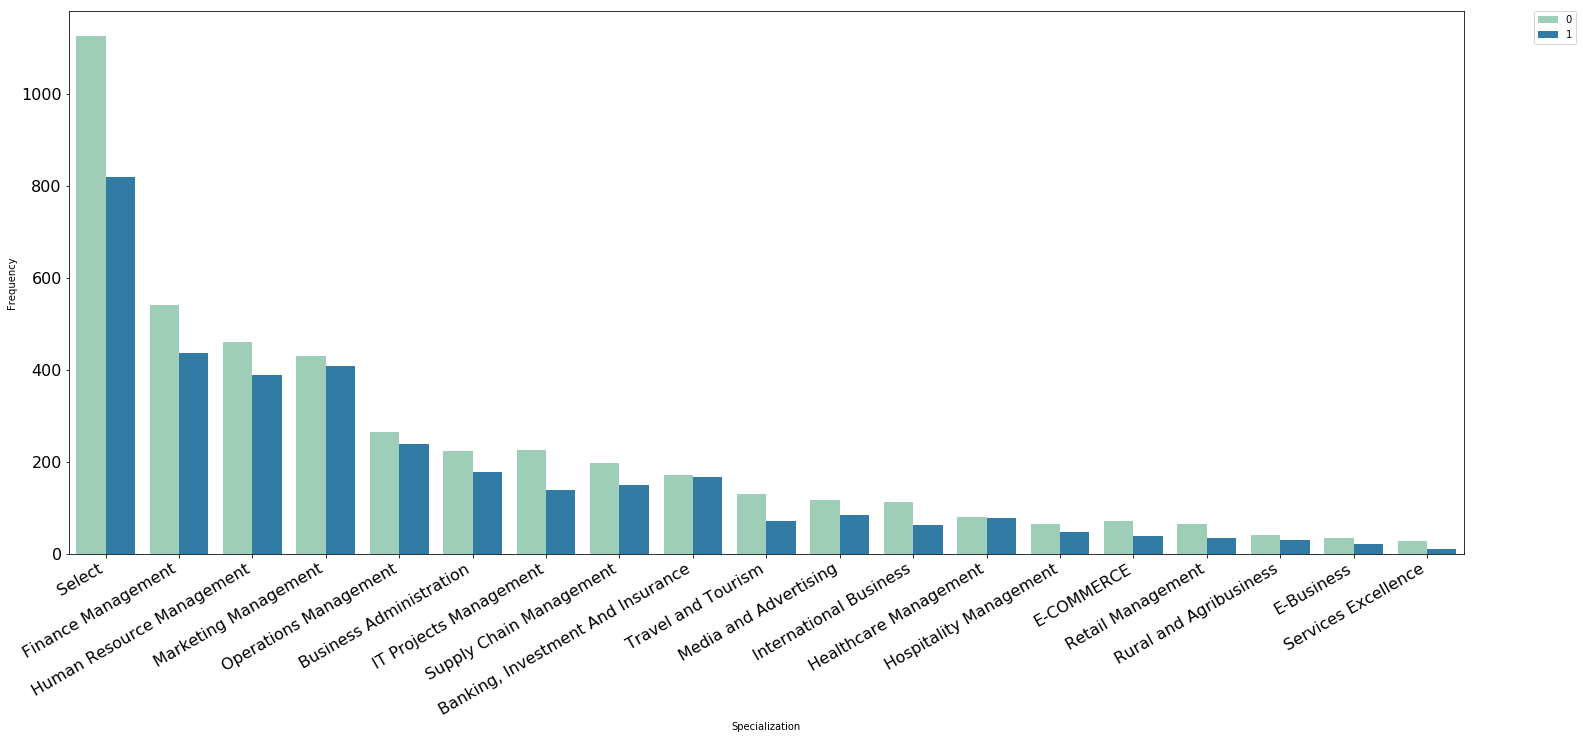

In [882]:
#Specialization
univ_plot(df=lead_df,feature='Specialization',hue='Converted',xlabel='Specialization', ylabel='Frequency', savefig='Specialization')

__Specialization has a large number of 'Select' values, which means user has not select any value during form filling. We also see that for most of the courses, the conversion rate is "almost" the same. 
From this, We can infer that the Specialization does not impact the decision to enroll__ 

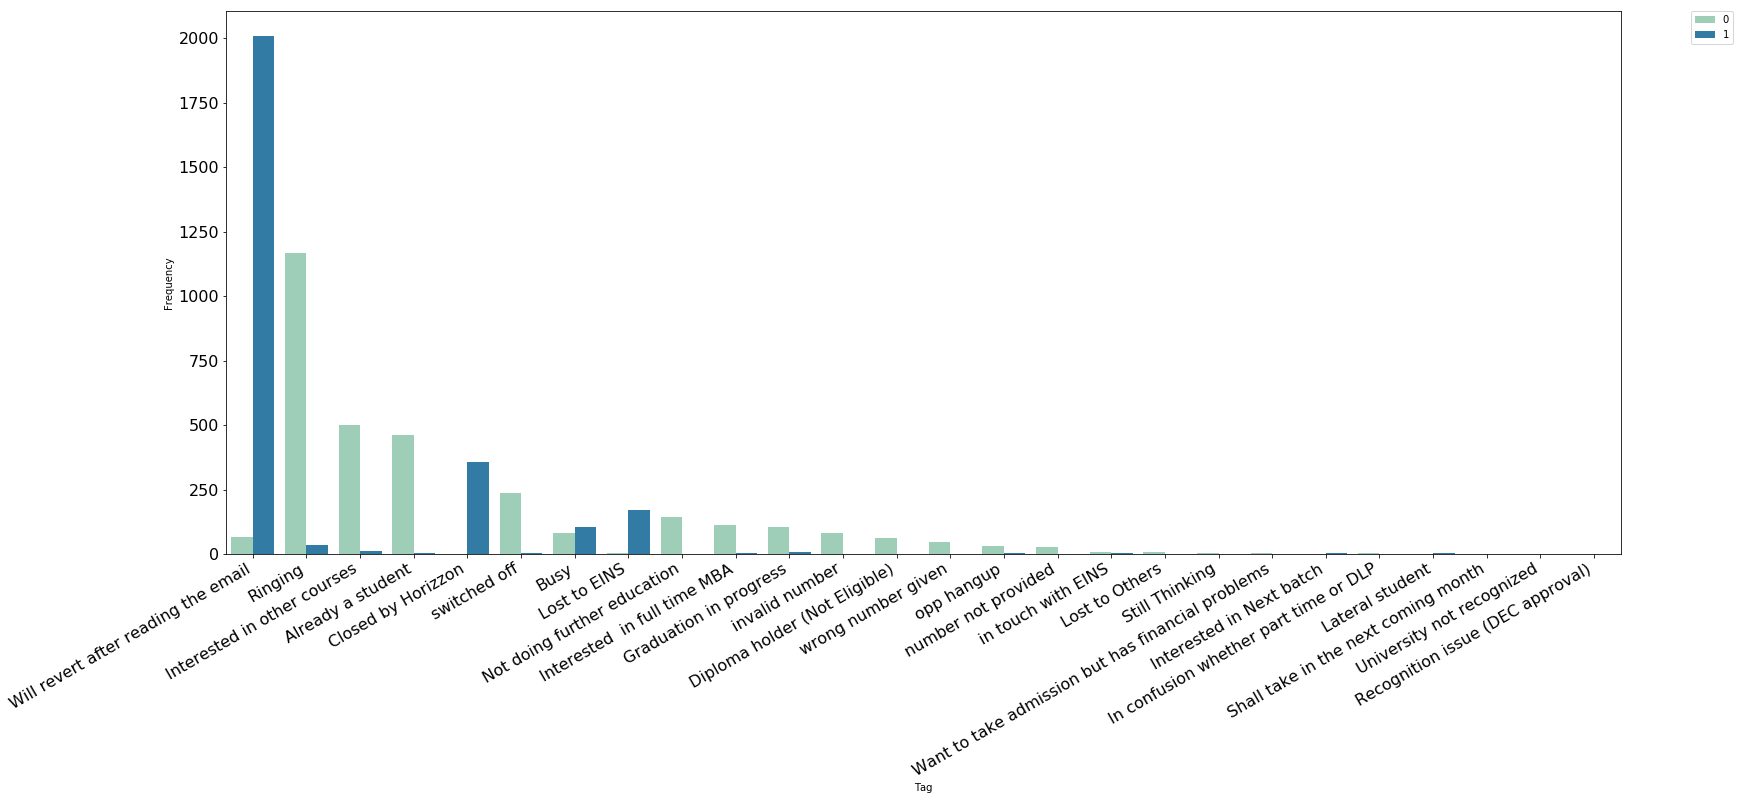

In [883]:
#Tags
univ_plot(df=lead_df,feature='Tags',hue='Converted',xlabel='Tag', ylabel='Frequency', savefig='tags')

__There is not much that can be inferred from this feature. We can possibly drop this feature__

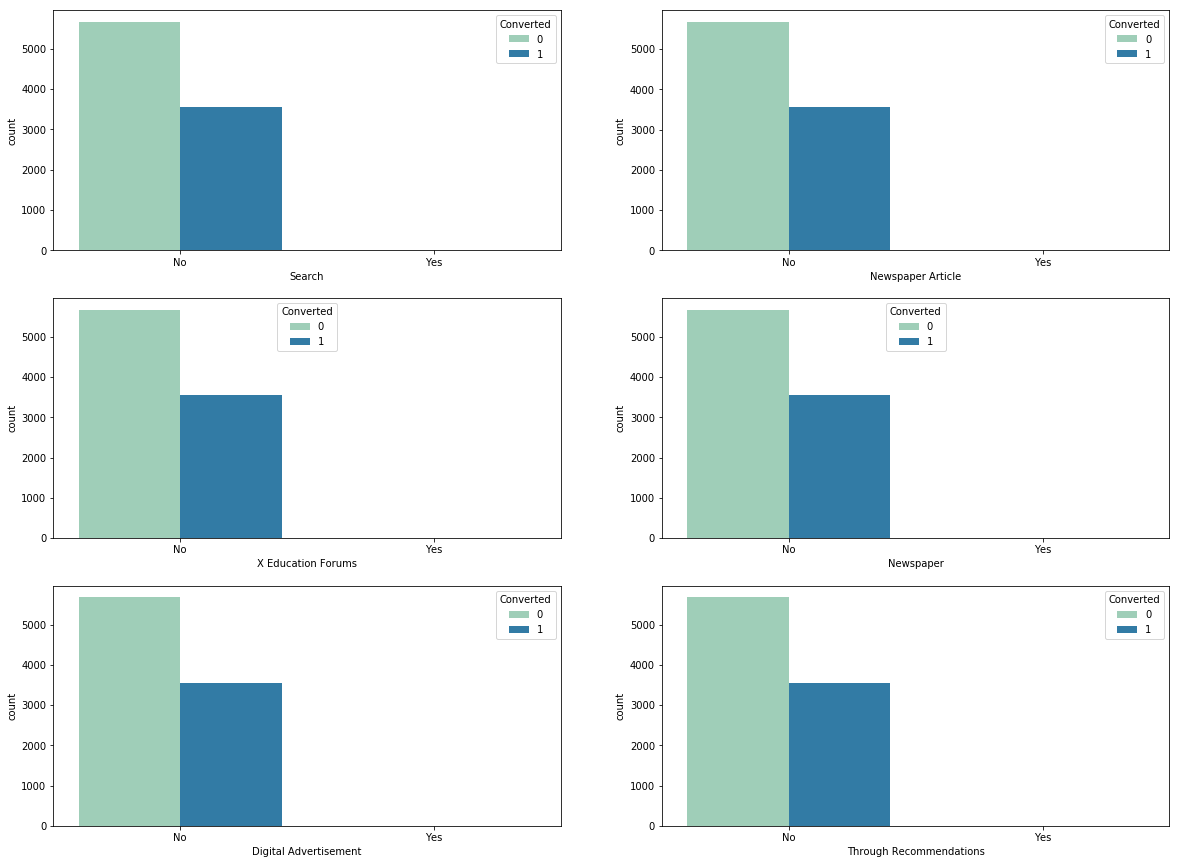

In [884]:
f, ax = plt.subplots(figsize=(20, 15))
#
plt.subplot(3,2,1)
sns.countplot(data=lead_df, x='Search', hue='Converted', order=lead_df['Search'].value_counts().index,palette='YlGnBu' )

plt.subplot(3,2,2)
sns.countplot(data=lead_df, x='Newspaper Article', hue='Converted', order=lead_df['Newspaper Article'].value_counts().index,palette='YlGnBu' )

plt.subplot(3,2,3)
sns.countplot(data=lead_df, x='X Education Forums', hue='Converted', order=lead_df['X Education Forums'].value_counts().index,palette='YlGnBu' )

plt.subplot(3,2,4)
sns.countplot(data=lead_df, x='Newspaper', hue='Converted', order=lead_df['Newspaper'].value_counts().index,palette='YlGnBu' )

plt.subplot(3,2,5)
sns.countplot(data=lead_df, x='Digital Advertisement', hue='Converted', order=lead_df['Digital Advertisement'].value_counts().index,palette='YlGnBu' )

plt.subplot(3,2,6)
sns.countplot(data=lead_df, x='Through Recommendations', hue='Converted', order=lead_df['Through Recommendations'].value_counts().index,palette='YlGnBu' )

plt.savefig('digitalChannel.png')

__This plot is quite interesting. It essentially plots the impact of Digital and Print media campaigns. As is clear from the plots above, these starategies have *not* been successful at all, and this is one area that the company should focus more on__ 

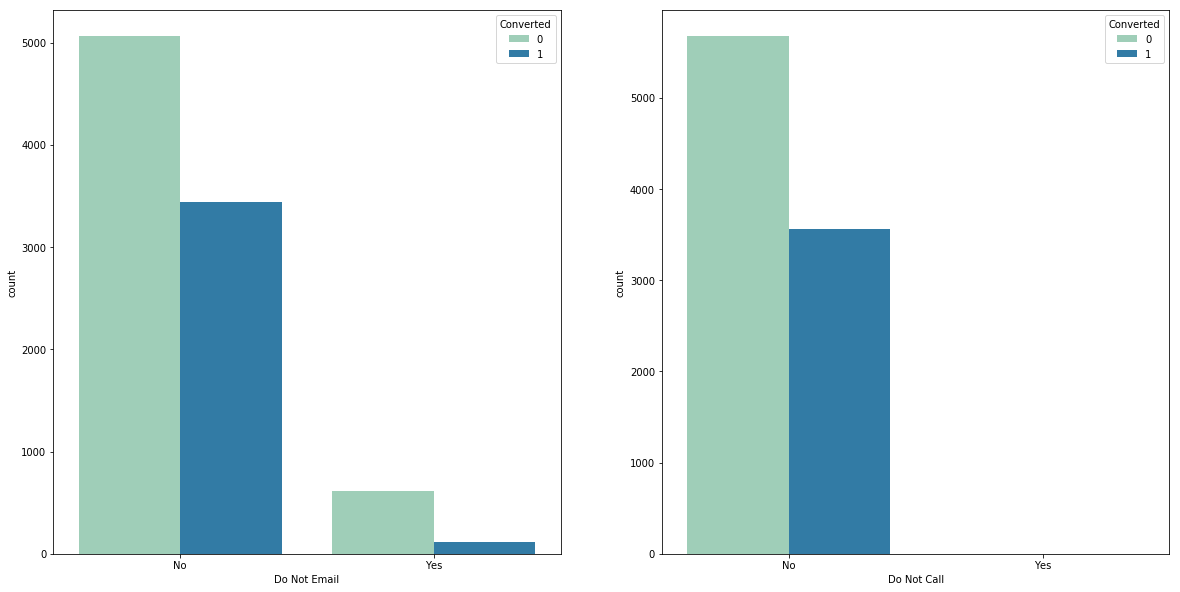

In [885]:
f, ax = plt.subplots(figsize=(20, 10))

plt.subplot(1,2,1)
sns.countplot(data=lead_df, x='Do Not Email', hue='Converted', order=lead_df['Do Not Email'].value_counts().index,palette='YlGnBu' )

plt.subplot(1,2,2)
sns.countplot(data=lead_df, x='Do Not Call', hue='Converted', order=lead_df['Do Not Call'].value_counts().index,palette='YlGnBu' )

plt.savefig('DNC.png')

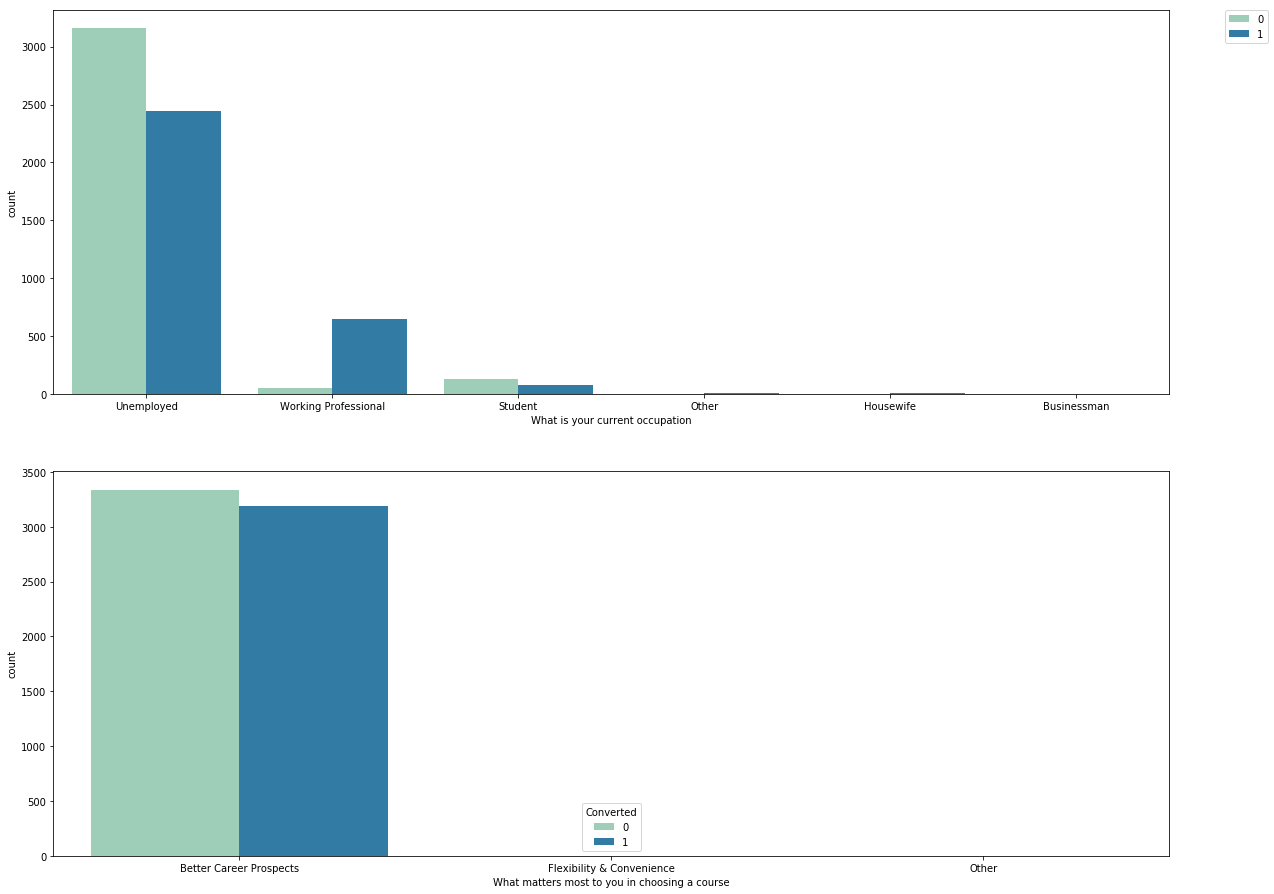

In [886]:
f, ax = plt.subplots(figsize=(20, 10))

plt.subplot(2,1,1)
sns.countplot(data=lead_df, x='What is your current occupation', hue='Converted', order=lead_df['What is your current occupation'].value_counts().index,palette='YlGnBu' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(top=1.3)
plt.subplot(2,1,2)
sns.countplot(data=lead_df, x='What matters most to you in choosing a course', hue='Converted', order=lead_df['What matters most to you in choosing a course'].value_counts().index,palette='YlGnBu' )
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('OccupationAspiration.png')


__From the plot above, we see that the highest conversion is from the 'Working Professional' group followed by Students. However, the most lead is generated from the 'Unemployed' category.
We also see that pretty much everyone is inquiring about the program for a 'Better Career Prospect'__

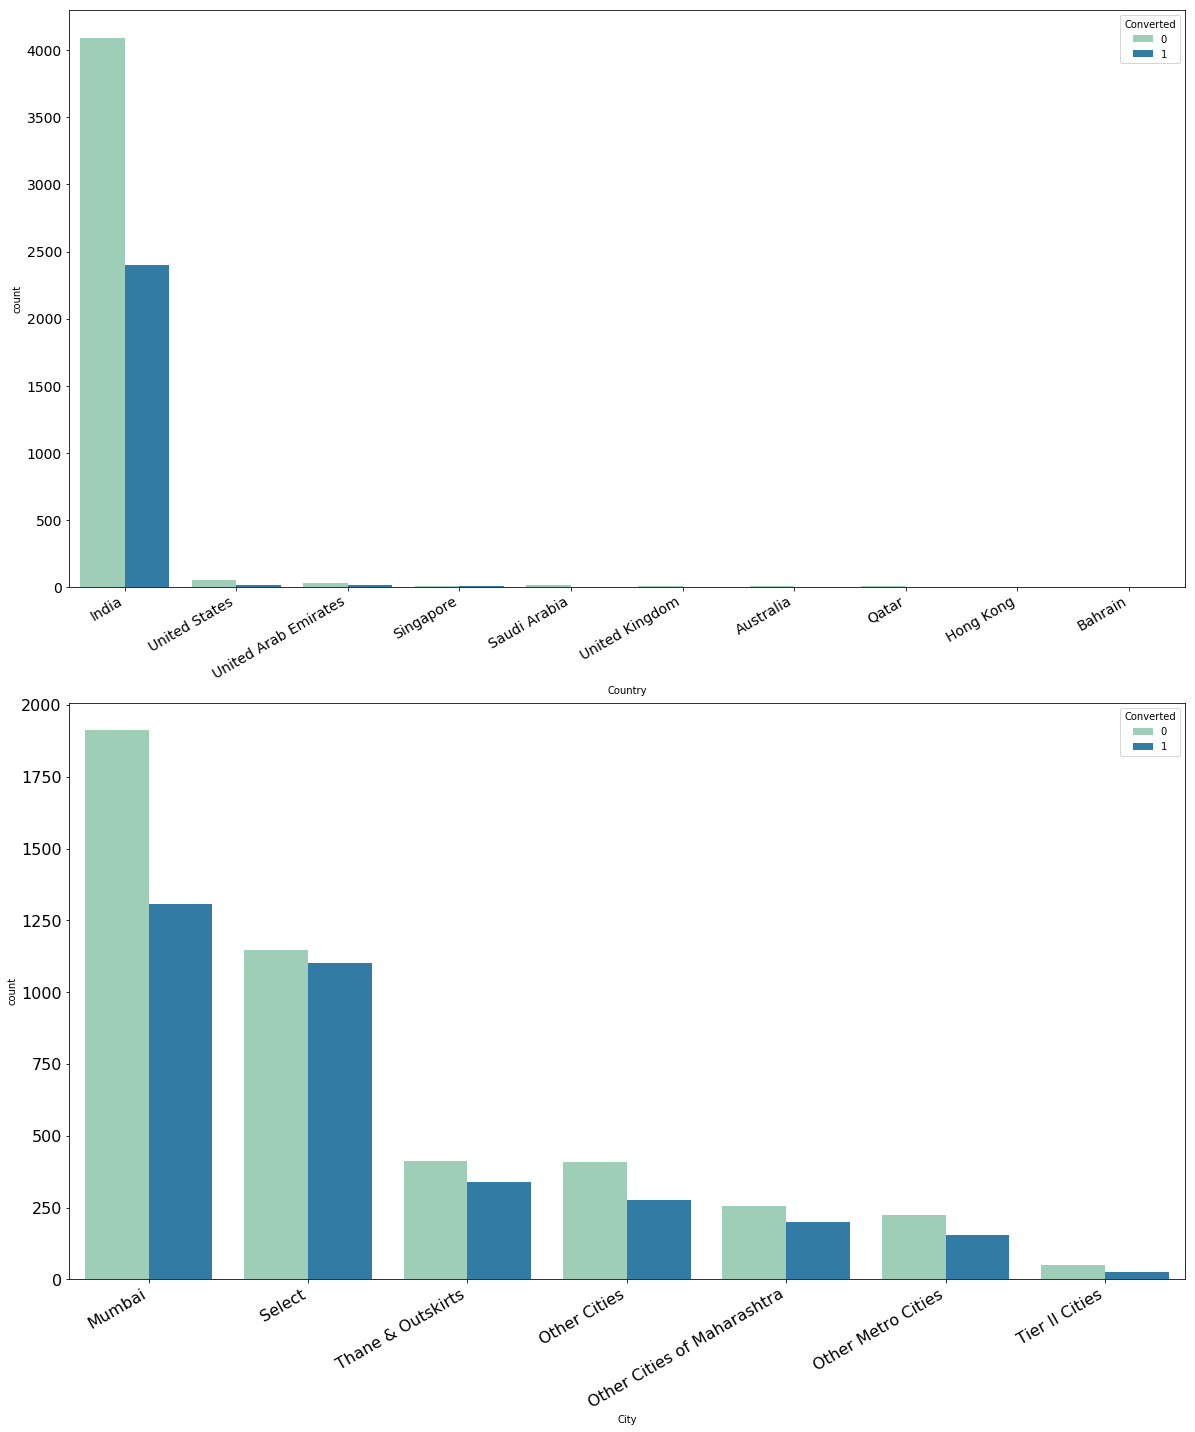

In [887]:
fig, ax = plt.subplots(figsize=(20, 15))

plt.subplot(2,1,1)
ax=sns.countplot(data=lead_df, x='Country', hue='Converted', order=lead_df['Country'].value_counts().index[:10],palette='YlGnBu' )
ax.tick_params(labelsize=14)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.subplots_adjust(top=1.3)

plt.subplot(2,1,2)
ax=sns.countplot(data=lead_df, x='City', hue='Converted', order=lead_df['City'].value_counts().index,palette='YlGnBu' )
ax.tick_params(labelsize=16)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
#ax.get_xticklabels()
plt.savefig('CountryCity.png')

__From the plot of Countries and City, there is not much that can be derived that impacts the conversion rate.__ 
- Most of the leads are from India, followed by USA, and UAE, and negligible from other countries. There is not a lot of variance in data for it to be meaningful. We can drop this feature
- Most of Enquiries are from Mumbai and it's suburbs (Thane & Ouskirts). Other values are too ambiuous to make any judgement, and can be dropped for further analysis

## Data Engineering

Following Categorical features need to be converted to Numeric values:

__Yes/No__:
- Do Not Email	
- Do Not Call
- Magazine	Newspaper Article	
- X Education Forums	
- Newspaper	
- Digital Advertisement	
- Through Recommendations	
- Receive More Updates About Our Courses
- Update me on Supply Chain Content	
- Get updates on DM Content
- I agree to pay the amount through cheque	
- A free copy of Mastering The Interview


__Categorical Values__
-  Lead Origin
-  Lead Source - club less frequent values together
-  Tags
-  Lead Quality
-  Lead Profile
-  City
-  Last_notable_activity
-  Country (?)


In [888]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [889]:
# Yes/No values will be converted to 1/0
yn_col=['Do Not Email', 'Do Not Call', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations','Search',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 
        'Get updates on DM Content','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

#Categorical Columns
cat_cols=['Lead Origin', 'Lead Source', 'Tags', 'Lead Quality','Lead Profile', 'City','Last Notable Activity',
          'Country','Specialization','How did you hear about X Education', 'What is your current occupation']

#columns to drop
# Prospect Id - does not add value. We can use Lead Number, which is also unique
# Magazine - Only 1 value, no variance
# Receive More Updates About Our Courses - Only 1 value, no variance
# Update me on Supply Chain Content - Only 1 value, no variance
# Get updates on DM Content - Only 1 value, no variance
#I agree to pay the amount through cheque - Only 1 value, no variance

cols_to_drop=['Prospect ID','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content', 
              'Get updates on DM Content','I agree to pay the amount through cheque']

#numeric cols
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#columns with very low variance
low_var = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',\
         'Newspaper','Digital Advertisement','Through Recommendations',\
         'Receive More Updates About Our Courses', 'Magazine','I agree to pay the amount through cheque',\
         'Update me on Supply Chain Content','Get updates on DM Content','Tags']

In [890]:
#Get the unique list of columns to drop
drop_cols=set(cols_to_drop).union(set(low_var))
drop_cols

{'Digital Advertisement',
 'Do Not Call',
 'Do Not Email',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Magazine',
 'Newspaper',
 'Newspaper Article',
 'Prospect ID',
 'Receive More Updates About Our Courses',
 'Search',
 'Tags',
 'Through Recommendations',
 'Update me on Supply Chain Content',
 'X Education Forums'}

__Convert Yes/No Columns to numeric, Yes=1, No=0__

In [891]:
#Convert all Yes/No Columns to numeric Yes=1, No=0
lead_df[yn_col]= lead_df[yn_col].applymap(lambda x: 1 if x=='Yes' else 0)

In [892]:
#Drop the columns that are not needed
lead_df.drop(columns=drop_cols, axis=1, inplace=True)

In [893]:
#Check te shape of dataframe
lead_df.shape

(9240, 22)

In [894]:
# The following columns has 'Select' as one of the values. We need to replace 'select' with Null, as select essentially
# means nothing. It might be beause the use/analyst did not pick the right value from dropdown

lead_df[['Specialization','How did you hear about X Education','Lead Profile','City']] = lead_df[['Specialization','How did you hear about X Education','Lead Profile','City']].replace({'Select':np.NaN})

In [895]:
#Check for NULL values percentages
(round(lead_df.isnull().sum()/len(lead_df),2)*100).sort_values(ascending=False) 

How did you hear about X Education              78.00
Lead Profile                                    74.00
Lead Quality                                    52.00
Asymmetrique Profile Score                      46.00
Asymmetrique Activity Score                     46.00
Asymmetrique Profile Index                      46.00
Asymmetrique Activity Index                     46.00
City                                            40.00
Specialization                                  37.00
What is your current occupation                 29.00
What matters most to you in choosing a course   29.00
Country                                         27.00
Last Activity                                    1.00
Page Views Per Visit                             1.00
TotalVisits                                      1.00
Lead Origin                                      0.00
Converted                                        0.00
Lead Source                                      0.00
Last Notable Activity       

In [896]:
# From the table above, we see that columns 'How did you hear about X Education' and 'Lead profile' have very high values 
# of NULL's and therefore cannot be used in the analysis.
# There is also no practical way to impute these columns with some values, so the best possible recourse is to drop them
#
#Columns will have to be dropped
#
#How did you hear about X Education               78.0
#Lead Profile                                     74.0
#Lead Quality                                     52.0
#Asymmetrique Profile Score                       46.0
#Asymmetrique Activity Score                      46.0
#Asymmetrique Profile Index                       46.0
#Asymmetrique Activity Index                      46.0
#City                                             40.0
#Country                                          27.0

## Further Analysis
#Specialization                                   37.0
#Tags                                             36.0
#What matters most to you in choosing a course    29.0
#What is your current occupation                  29.0

#
#
#lead_df.drop(['How did you hear about X Education','Lead Profile'], axis=1, inplace=True)

In [897]:
#Drop columns with most NULLs
lead_df.drop(columns=['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index',
                      'Asymmetrique Activity Index','City','Lead Quality', 'Country','How did you hear about X Education',
                      'Lead Profile'], axis=1, inplace=True)

In [898]:
#Check for NULL values percentages
(round(lead_df.isnull().sum()/len(lead_df),2)*100).sort_values(ascending=False) 

Specialization                                  37.00
What matters most to you in choosing a course   29.00
What is your current occupation                 29.00
Last Activity                                    1.00
Page Views Per Visit                             1.00
TotalVisits                                      1.00
Last Notable Activity                            0.00
A free copy of Mastering The Interview           0.00
Total Time Spent on Website                      0.00
Converted                                        0.00
Lead Source                                      0.00
Lead Origin                                      0.00
Lead Number                                      0.00
dtype: float64

In [899]:
# 'Specialization' and 'Tag' have almost 36% NULL's. However,they seem to be relevant in analysis, and there is no meaningful
# way to impute them. 
#As such, we will be defaulting NULL values with 'Unknown' value
lead_df[['Specialization']] = lead_df[['Specialization']].apply(lambda x: x.fillna('Unknown'))

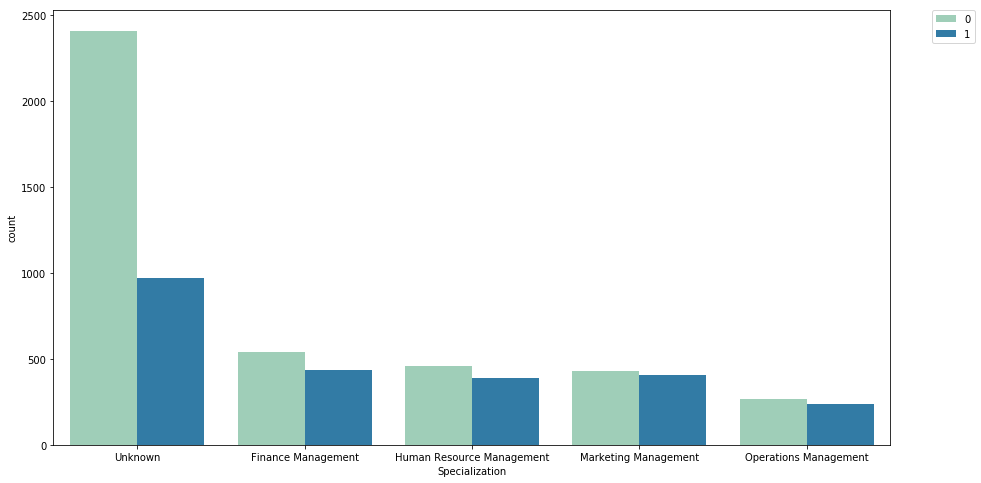

In [900]:
f, ax = plt.subplots(figsize=(15, 8))

#plt.subplot(1,1,1)
sns.countplot(data=lead_df, x='Specialization', hue='Converted', order=lead_df['Specialization'].value_counts().index[:5],palette='YlGnBu' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.subplots_adjust(top=1.3)

plt.savefig('Specialization1.png')

In [901]:
# What matters most to you in choosing a course   - ~71% of the values are 'Better Career prospect'. We can impute the Null
# with 'Unknown'
# Same can be done with 'What is your current occupation'                 
lead_df[['What matters most to you in choosing a course','What is your current occupation']] =\
        lead_df[['What matters most to you in choosing a course','What is your current occupation']].apply(lambda x: x.fillna('Unknown'))

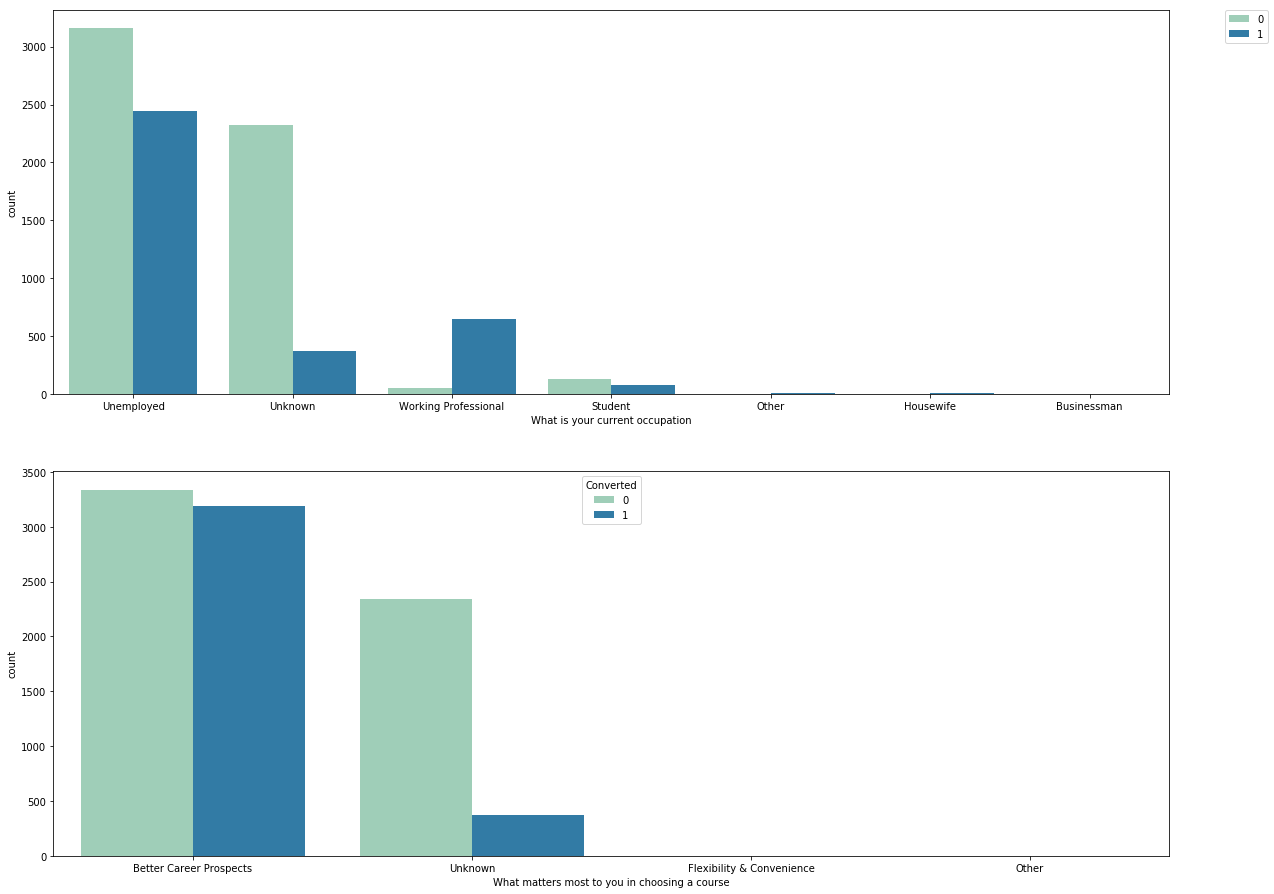

In [902]:
f, ax = plt.subplots(figsize=(20, 10))

plt.subplot(2,1,1)
sns.countplot(data=lead_df, x='What is your current occupation', hue='Converted', order=lead_df['What is your current occupation'].value_counts().index,palette='YlGnBu' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplots_adjust(top=1.3)
plt.subplot(2,1,2)
sns.countplot(data=lead_df, x='What matters most to you in choosing a course', hue='Converted', order=lead_df['What matters most to you in choosing a course'].value_counts().index,palette='YlGnBu' )
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('OccupAspir.png', bbox_inches='tight')

__The percentage of conversion is highest for working professionals, but the volume is highes in the Unemployed segment. Volume for Students is low, but has decent conversion percentage and can be a strategy to target them__

In [903]:
'''
TotalVisits	Total 
Time Spent on Website
Page Views Per Visit

If we look at the data, there is value for 'Total Time Spent on Website' but TotalVists, and 'Page Views per Visit'
columns are NULL. This could be a data issue.
We can impute these numerical/continuous variables with mean of the featues
'''
#'TotalVisits','Total Time Spent on Website','Page Views Per Visit','Last Activity', 'Specialization'
lead_df[['TotalVisits','Page Views Per Visit']]= lead_df[['TotalVisits','Page Views Per Visit']].apply(lambda x: x.fillna(x.mean(), axis=0))


__Re-plot the continuous variables to derive insights__

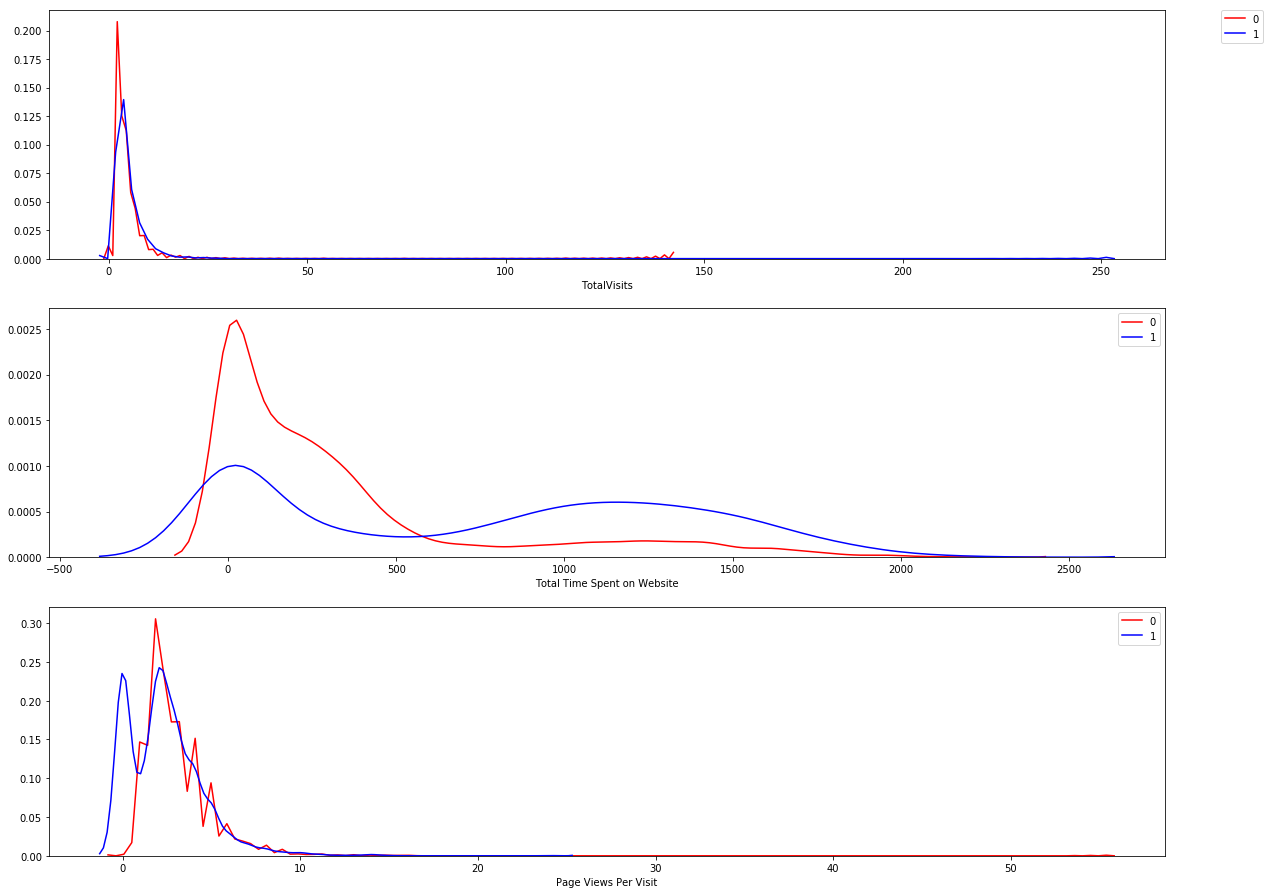

In [904]:
#Plot Page Views Per Visit
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
g1 = sns.distplot(lead_df[lead_df['Converted']==0]['TotalVisits'],hist=False, label='0', color='r')
g2 = sns.distplot(lead_df[lead_df['Converted']==1]['TotalVisits'],hist=False,  label='1', color='b')
#plt.legend(('Converted=0','Converted=1'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2 , borderaxespad=0.)

plt.subplots_adjust(top=1.3)
plt.subplot(3,1,2)
g1 = sns.distplot(lead_df[lead_df['Converted']==0]['Total Time Spent on Website'],hist=False, label='0', color='r')
g2 = sns.distplot(lead_df[lead_df['Converted']==1]['Total Time Spent on Website'],hist=False,  label='1', color='b')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2 , borderaxespad=0.)

plt.subplots_adjust(top=1.3)
plt.subplot(3,1,3)
g1 = sns.distplot(lead_df[lead_df['Converted']==0]['Page Views Per Visit'],hist=False, label='0', color='r')
g2 = sns.distplot(lead_df[lead_df['Converted']==1]['Page Views Per Visit'],hist=False,  label='1', color='b')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2 , borderaxespad=0.)
plt.savefig('pageMetrics.png')

In [905]:

#Check for NULL values percentages
(round(lead_df.isnull().sum()/len(lead_df),2)*100).sort_values(ascending=False) 

Last Activity                                   1.00
Last Notable Activity                           0.00
A free copy of Mastering The Interview          0.00
What matters most to you in choosing a course   0.00
What is your current occupation                 0.00
Specialization                                  0.00
Page Views Per Visit                            0.00
Total Time Spent on Website                     0.00
TotalVisits                                     0.00
Converted                                       0.00
Lead Source                                     0.00
Lead Origin                                     0.00
Lead Number                                     0.00
dtype: float64

In [906]:
# Since the 'Last Activity' column has ~1% nulls we can safely drop those rows 
#lead_df[~np.isnan(lead_df['Last Activity'])]
lead_df = lead_df[~lead_df['Last Activity'].isnull()]

In [907]:
#Check for rows with 3 or more missing values
lead_df[lead_df.isnull().sum(axis=1)>3]

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity


In [908]:
lead_df.shape

(9137, 13)

We have reduced form 37 variables to 17 and dropped ~1% (103) records

### Check for correlation

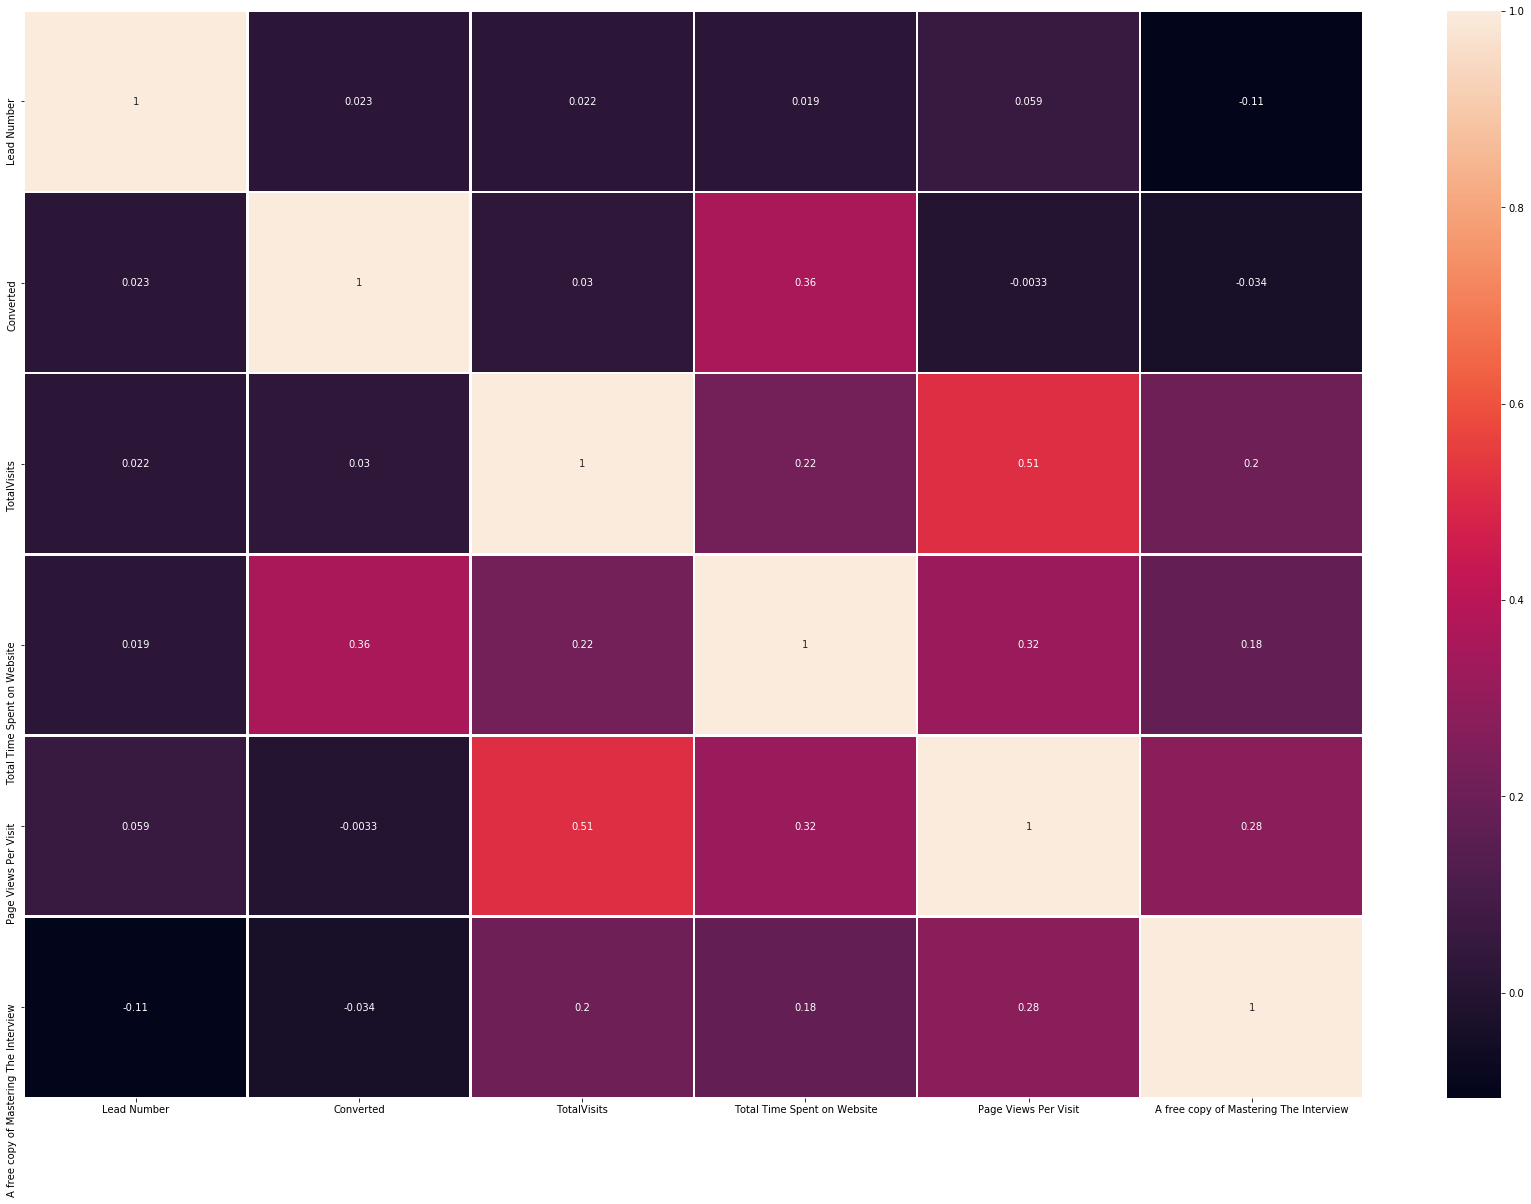

In [909]:
plt.figure(figsize=(30,20))
sns.heatmap(lead_df.corr(), annot=True, linewidths=1.5)
plt.savefig('heatmap.png')
plt.show()

__From the heatmap above, we identify that some features are positively correlated, whereas for most of them there is a very low to negative correlation.
Positive Correlation:__
-  TotalVisits, Total Time Spent on Website, Page View per Visit, A Free Copy of Mastering the Interview
-  Through Recommendations, Search, Newspaper Article, X Education Forums, Digital Advertisement 

__We also see that the 'Converted' variable/outcome has a good correlation with 'Total Time Spent on Website'__  

In [910]:
## Take a backup of the cleaned data set
lead_df_bkp1=lead_df.copy()
#lead_df_bkp1.head()

## Convert all categorical columns to dummy variables
<br>
Before processing further, we need to convert all categorical variables to dummy variables

In [911]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Unknown,Unemployed,Better Career Prospects,0,Modified
1,660728,API,Organic Search,0,5.00,674,2.50,Email Opened,Unknown,Unemployed,Better Career Prospects,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,Modified
4,660681,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,Unknown,Unemployed,Better Career Prospects,0,Modified


In [912]:
lead_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [913]:
categ_cols=['Lead Origin','Lead Source','Last Activity','Specialization','Last Notable Activity',
            'What matters most to you in choosing a course','A free copy of Mastering The Interview', 'What is your current occupation']

In [914]:
#Create dummy variables for all categorical variables
categ = pd.get_dummies(lead_df[categ_cols],drop_first=True)

In [915]:
categ.head()

,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_View in browser link Clicked,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [916]:
# Concatenate the one-hot encoded/dummy variables to the original data set
lead_df=pd.concat([lead_df,categ],axis=1)

In [917]:
#Drop the original categorical features, since they are all represented by dummy variables now 
lead_df.drop(columns=categ_cols, axis=1, inplace=True)

In [918]:
print(lead_df.shape)
lead_df.head()

(9137, 77)


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_View in browser link Clicked,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,660737,0,0.00,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,660728,0,5.00,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,660727,1,2.00,1532,2.00,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,660719,0,1.00,305,1.00,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,660681,1,2.00,1428,1.00,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


We have gone from 22 features to 112

In [919]:
lead_df.dtypes

Lead Number                                                                  int64
Converted                                                                    int64
TotalVisits                                                                float64
Total Time Spent on Website                                                  int64
Page Views Per Visit                                                       float64
Lead Origin_Landing Page Submission                                          uint8
Lead Origin_Lead Add Form                                                    uint8
Lead Origin_Lead Import                                                      uint8
Lead Origin_Quick Add Form                                                   uint8
Lead Source_Direct Traffic                                                   uint8
Lead Source_Facebook                                                         uint8
Lead Source_Google                                                           uint8
Lead

## Split intoTrain/Test Split

In [920]:
#Remove target variable from feature set
Y=lead_df.pop('Converted')

In [921]:
# Divide the dataset into 70-30 for training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(lead_df, Y, train_size=0.7, test_size=0.3, random_state=100)

In [922]:
print("Training Data Set, Shape: ",X_train.shape, " Target shape: ",Y_train.shape)
print("    Test Data Set, Shape: ",X_test.shape, "  Target shape: ",Y_test.shape)

Training Data Set, Shape:  (6395, 76)  Target shape:  (6395,)
    Test Data Set, Shape:  (2742, 76)   Target shape:  (2742,)


## Standardize the contiuous variables

In [923]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [924]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [925]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train[num_cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
8701,-0.61,0.21,-0.62
6684,0.39,1.82,1.20
4406,-0.86,-0.88,-1.08
2487,-0.86,-0.88,-1.08
561,-0.11,2.14,0.29


In [926]:
#Scale the continuous features on the test set 
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [927]:
X_test[num_cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
5080,-0.11,1.60,0.29
1893,1.14,-0.59,-0.17
5432,-0.86,-0.88,-1.08
3549,0.14,1.34,0.74
8231,0.39,-0.83,1.20


## Check for Correlation between different dummy variables

In [928]:
plt.figure(figsize=(165,165))
ax=sns.heatmap(lead_df.corr(), annot=True, annot_kws={"size": 10})
#ax.tick_params(labelsize=10)

From the plot above, we see there is a very high degree of correlation between the different features. There are some features where the correlation is low, and those are the ones we will have to focus on

In [929]:
# Can we drop any of the highly correlated variables?

In [930]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6395 entries, 8701 to 5712
Data columns (total 76 columns):
Lead Number                                                                6395 non-null int64
TotalVisits                                                                6395 non-null float64
Total Time Spent on Website                                                6395 non-null float64
Page Views Per Visit                                                       6395 non-null float64
Lead Origin_Landing Page Submission                                        6395 non-null uint8
Lead Origin_Lead Add Form                                                  6395 non-null uint8
Lead Origin_Lead Import                                                    6395 non-null uint8
Lead Origin_Quick Add Form                                                 6395 non-null uint8
Lead Source_Direct Traffic                                                 6395 non-null uint8
Lead Source_Facebook         

In [931]:
#Drop the Lead Number column from both training and Test dataset. 
X_train.drop('Lead Number', axis=1, inplace=True)
X_test.drop('Lead Number', axis=1, inplace=True)

In [932]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_View in browser link Clicked,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
8701,-0.61,0.21,-0.62,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
6684,0.39,1.82,1.20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4406,-0.86,-0.88,-1.08,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2487,-0.86,-0.88,-1.08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
561,-0.11,2.14,0.29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Recursive Feature Elimination
<br>
Use RFE and VIF to reduce extra and multicollinear features and to identify the most relevant ones 

In [933]:
# Create a model with all the features to get a baseline of feature significance
import statsmodels.api as sm

In [934]:
# Logistic regression model
mod1 = sm.GLM(Y_train.astype(float),(sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())
mod1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        15:19:55   Pearson chi2:                 7.30e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    3.613e+15      8e+07   4.52e+07      0.000    3.61e+15    3.61e+15
TotalVisits                                                              1.015e+14   1.18e+06   8.59e+07      0.000    1.01e+14    1.01e+14
Total Time Spent on Website                                              8.349e+14   9.72e+05   8.59e+08      0.000    8.35e+14    8.35e+14
Page Views Per Visit                                                    -1.406e+14    1.3e+06  -1.08e+08      0.000   -1.41e+14   -1.41e+14
Lead Origin_Landing Page Submission                                      2.287e+14   3.38e+06   6.76e+07      0.000    2.29e+14    2.29e+14
Lead Origin_Lead Add Form                                                1.493e+15   3.15e+07   4.74e+07      0.000    1.49e+15    1.49e+15
Lead Origin_Lead Import                                                 -4.952e+15   7.48e+07  -6.62e+07      0.000   -4.95e+15   -4.95e+15
Lead Origin_Quick Add Form                                                 44.4867   2.89e-06   1.54e+07      0.000      44.487      44.487
Lead Source_Direct Traffic                                              -9.857e+14   3.28e+07     -3e+07      0.000   -9.86e+14   -9.86e+14
Lead Source_Facebook                                                      4.76e+15   6.83e+07   6.97e+07      0.000    4.76e+15    4.76e+15
Lead Source_Google                                                      -6.711e+14   3.28e+07  -2.04e+07      0.000   -6.71e+14   -6.71e+14
Lead Source_Olark Chat                                                   8.828e+13   3.29e+07   2.68e+06      0.000    8.83e+13    8.83e+13
Lead Source_Organic Search                                              -8.087e+14   3.29e+07  -2.46e+07      0.000   -8.09e+14   -8.09e+14
Lead Source_Others                                                       -3.14e+14   3.44e+07  -9.12e+06      0.000   -3.14e+14   -3.14e+14
Lead Source_Reference                                                   -3.318e+14    1.3e+07  -2.55e+07      0.000   -3.32e+14   -3.32e+14
Lead Source_Referral Sites                                              -8.199e+14   3.37e+07  -2.44e+07      0.000    -8.2e+14    -8.2e+14
Lead Source_Welingak Website                                             2.935e+15   1.44e+07   2.04e+08      0.000    2.93e+15    2.93e+15
Lead Source_bing                                                        -2.941e+15   5.08e+07  -5.79e+07      0.000   -2.94e+15   -2.94e+15
Last Activity_Converted to Lead                                         -2.915e+15   3.05e+07  -9.56e+07      0.000   -2.91e+15   -2.91e+15
Last Activity_Email Bounced                                             -3.703e+15

In [935]:
#To check VIF we need to fit on Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [936]:
#Create a RFE model with 25 outputs. This is on the higher side,but we want to reduce the number iteratively
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, Y_train)

In [937]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Unknown',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'What matters most to you in choosing a course_Unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your curr

In [938]:
rfe_col_drop=X_train.columns[~rfe.support_]

rfe_col_drop

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_bing',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT P

In [939]:
#Drop the columns from both training and test set
X_train.drop(columns=rfe_col_drop, inplace=True)
X_test.drop(columns=rfe_col_drop, inplace=True)

In [940]:
def trainLR(df):
    logm2 = sm.GLM(Y_train,sm.add_constant(X_train), family = sm.families.Binomial())
    res = logm2.fit()
    print(res.summary())

In [941]:
#Funciton to find the Variance Inflation factor to determine collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Create a function to calculate VIF
def vif(features):
    vif= pd.DataFrame()
    vif['Features']=features.columns
    vif['VIF']=[variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model 1

In [942]:
#Train with 
trainLR(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6370
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.6
Date:                Sun, 03 Mar 2019   Deviance:                       5097.2
Time:                        15:19:57   Pearson chi2:                 6.43e+03
No. Iterations:                    23   Covariance Type:             nonrobust
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                        

In [943]:
#Check VIF score
vif(X_train)

,Features,VIF
16,Last Notable Activity_Resubscribed to emails,inf
10,Last Activity_Resubscribed to emails,inf
19,What matters most to you in choosing a course_...,169.85
23,What is your current occupation_Unknown,168.55
22,What is your current occupation_Unemployed,10.52
1,Lead Origin_Landing Page Submission,8.28
11,Last Activity_SMS Sent,6.67
17,Last Notable Activity_SMS Sent,5.08
13,Specialization_Unknown,4.84
7,Last Activity_Email Opened,3.13


There are some very high values of p-scores. They are insginificant and should be dropped

In [944]:
X_train.drop(columns=['What is your current occupation_Unknown','What is your current occupation_Housewife','What matters most to you in choosing a course_Unknown',\
                     'Last Notable Activity_Resubscribed to emails','Last Activity_Resubscribed to emails','Lead Source_Welingak Website'],
            inplace=True)

### Model 2

In [945]:
trainLR(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6375
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.8
Date:                Sun, 03 Mar 2019   Deviance:                       5153.6
Time:                        15:19:59   Pearson chi2:                 6.74e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

In [946]:
vif(X_train)

,Features,VIF
9,Last Activity_SMS Sent,6.16
14,Last Notable Activity_SMS Sent,5.05
1,Lead Origin_Landing Page Submission,4.05
17,What is your current occupation_Unemployed,2.85
11,Specialization_Unknown,2.63
6,Last Activity_Email Opened,2.57
4,Lead Source_Olark Chat,2.22
3,Lead Source_Direct Traffic,1.91
8,Last Activity_Olark Chat Conversation,1.79
7,Last Activity_Had a Phone Conversation,1.69


__From the summary above, we see that only 1 feature has a high p-score__  

In [947]:
X_train.drop(columns=['Last Activity_Had a Phone Conversation'],inplace=True)

### Model 3

In [948]:
trainLR(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6376
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.0
Date:                Sun, 03 Mar 2019   Deviance:                       5154.0
Time:                        15:19:59   Pearson chi2:                 6.74e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

In [949]:
#Check VIF
vif(X_train)

,Features,VIF
8,Last Activity_SMS Sent,6.15
13,Last Notable Activity_SMS Sent,5.05
1,Lead Origin_Landing Page Submission,4.04
16,What is your current occupation_Unemployed,2.85
10,Specialization_Unknown,2.62
6,Last Activity_Email Opened,2.56
4,Lead Source_Olark Chat,2.22
3,Lead Source_Direct Traffic,1.91
7,Last Activity_Olark Chat Conversation,1.79
2,Lead Origin_Lead Add Form,1.46


In [950]:
#Last Activity_SMS Sent has a high VIF, so we will drop it and re-test
X_train.drop('Last Activity_SMS Sent',axis=1,inplace=True)

### Model 4

In [951]:
trainLR(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6377
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.8
Date:                Sun, 03 Mar 2019   Deviance:                       5185.5
Time:                        15:20:00   Pearson chi2:                 6.73e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

In [952]:
vif(X_train)

,Features,VIF
1,Lead Origin_Landing Page Submission,3.63
15,What is your current occupation_Unemployed,2.85
9,Specialization_Unknown,2.45
6,Last Activity_Email Opened,2.27
4,Lead Source_Olark Chat,2.20
12,Last Notable Activity_SMS Sent,1.98
3,Lead Source_Direct Traffic,1.91
7,Last Activity_Olark Chat Conversation,1.70
2,Lead Origin_Lead Add Form,1.41
5,Last Activity_Email Bounced,1.36


#### This seems to be a good model, as all the p-scores are under 0.05 and VIF's are under 5 

In [953]:
logm4 = sm.GLM(Y_train,sm.add_constant(X_train), family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6377
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.8
Date:                Sun, 03 Mar 2019   Deviance:                       5185.5
Time:                        15:20:00   Pearson chi2:                 6.73e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

__Make a prediction with the given model__

In [954]:
#Identify the list of final features to keep
final_feat=X_train.columns
final_feat

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Specialization_Hospitality Management', 'Specialization_Unknown',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [955]:
len(final_feat)

17

__We have used RFE, VIF to eliminate features that are not significant or multicollinear. Using this feature set we will train the Logistic Regression model__

### Prepare a Logistic Regression Model, and train with Training dataset

In [956]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logReg = LogisticRegression(solver='lbfgs', random_state=101)
model = logReg.fit(X_train,Y_train)

In [957]:
#Check the accuracy of the model
model.score(X_train, Y_train)

0.8229867083659108

__The model has an accuracy of 82.29% !__

In [958]:
#Identify the columns to drop form the *test* dataset.
list(set(X_test.columns).difference(set(X_train.columns)))

['What is your current occupation_Unknown',
 'What is your current occupation_Housewife',
 'What matters most to you in choosing a course_Unknown',
 'Last Activity_SMS Sent',
 'Lead Source_Welingak Website',
 'Last Activity_Resubscribed to emails',
 'Last Activity_Had a Phone Conversation',
 'Last Notable Activity_Resubscribed to emails']

In [959]:
#Drop columns from test set that have been eliminated in the RFE process
X_test.drop(columns=list(set(X_test.columns).difference(set(X_train.columns))), inplace=True)

In [960]:
X_test.columns

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Specialization_Hospitality Management', 'Specialization_Unknown',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Make predictions and derive class probabilities with the given model

In [961]:
# Create a dataframe to store various statistics like predicted lable, prediction probability, actual label, and 
# prediction for various cutoff levels
test_stat=pd.DataFrame(columns=['Lead Number', 'conv_actual', 'conv_pred', 'conv_prob'])

In [962]:
ytf= pd.DataFrame(Y_test).join(lead_df['Lead Number'])
ytf.head()

,Converted,Lead Number
5080,1,611126
1893,0,641248
5432,1,608255
3549,1,626477
8231,0,587079


In [963]:
ytf.shape

(2742, 2)

In [964]:
test_stat['Lead Number'], test_stat['conv_actual'] =    ytf['Lead Number'], ytf['Converted']
print(test_stat.head())
print('Shape ',test_stat.shape)

      Lead Number  conv_actual conv_pred conv_prob
5080       611126            1       NaN       NaN
1893       641248            0       NaN       NaN
5432       608255            1       NaN       NaN
3549       626477            1       NaN       NaN
8231       587079            0       NaN       NaN
Shape  (2742, 4)


In [965]:
 model.predict(X_test).reshape(-1)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [966]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=101, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [967]:
#Make the prediction and get the prediction probabiity and save them in differnet columns
test_stat['conv_pred'] = model.predict(X_test).reshape(-1)
test_stat['conv_prob']= model.predict_proba(X_test)[:,1]

In [968]:
print(test_stat.head())
print(test_stat.shape)

      Lead Number  conv_actual  conv_pred  conv_prob
5080       611126            1          1       0.69
1893       641248            0          0       0.07
5432       608255            1          0       0.09
3549       626477            1          1       0.98
8231       587079            0          0       0.36
(2742, 4)


In [969]:
#Check the accuracy on test set
model.score(X_test,Y_test)

0.8140043763676149

__For the test data, we have an accuracy of ~81.4%, which is quite inline with training data (82.3%). This shows us that the model is not over/under fitting__

## Derive Metrics for model Evaluation

In [970]:
from sklearn import metrics

In [971]:
# Generate a confusion matrix 
confusion = metrics.confusion_matrix(test_stat['conv_actual'], test_stat['conv_pred'] )
confusion

array([[1487,  206],
       [ 304,  745]], dtype=int64)

####   Actual/Predicted       False         True
      # False       1487      206
      # True         304      745 

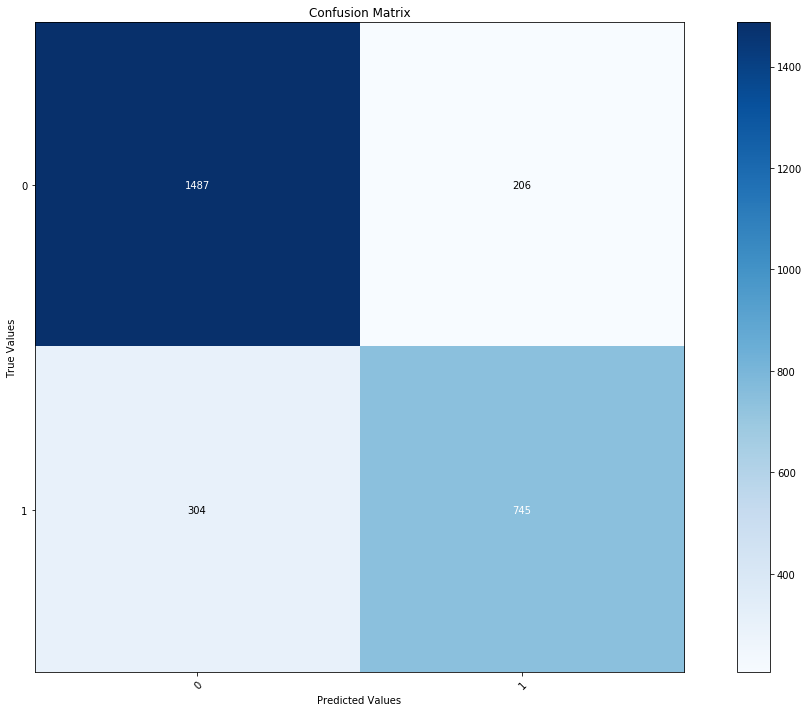

In [972]:
#Plot a confusion matrix :)
# Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


fig, ax = plt.subplots(figsize=(15,10))
im = ax.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(confusion.shape[1]),yticks=np.arange(confusion.shape[0]),
# ... and label them with the respective list entries
#xticklabels=confusion, yticklabels=confusion,
title='Confusion Matrix', ylabel='True Values', xlabel='Predicted Values')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt =  'd'
thresh = confusion.max() / 2.
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(j, i, format(confusion[i, j], fmt),ha="center", va="center",color="white" if confusion[i, j] > thresh else "black")

fig.tight_layout()
plt.savefig('confusionM.png')
plt.show()

In [973]:
# Let's check the overall accuracy.
metrics.accuracy_score(test_stat['conv_actual'], test_stat['conv_pred'] )

0.8140043763676149

In [974]:
# Dervive various components of the confusion Matrix

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [975]:
# sensitivity of our logistic regression model
print ('Sensitivity = ',TP / float(TP+FN))

Sensitivity =  0.7102001906577693


In [976]:
# specificity of our logistic regression model
print ('Specificity = ',TN / float(TN+FP))

Specificity =  0.8783225044300059


In [977]:
# Calculate the precision and recall for the model
print ('precision = ',(TP/float(TP+FP)))
print ('Recall = ',(TP/float(TP+FN)))

precision =  0.7833859095688749
Recall =  0.7102001906577693


In [978]:
# Calculate false postive rate 
print('False Positive Rate: ',FP/ float(TN+FP))

# positive predictive value 
print ('True Predictive Rate: ',TP / float(TP+FP))

# Negative predictive value
print ('Negative Predictive Rate: ',TN / float(TN+ FN))


False Positive Rate:  0.12167749556999409
True Predictive Rate:  0.7833859095688749
Negative Predictive Rate:  0.8302624232272473


### Draw the ROC curve to check the model fit

In [979]:
def draw_roc( actual, probs, savefig=None ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(15, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    if savefig !='':
        plt.savefig(savefig+'.png')
    plt.show()

    return None


In [980]:
#fpr, tpr, thresholds = metrics.roc_curve( Y_test,pred_test_prob, drop_intermediate = False )

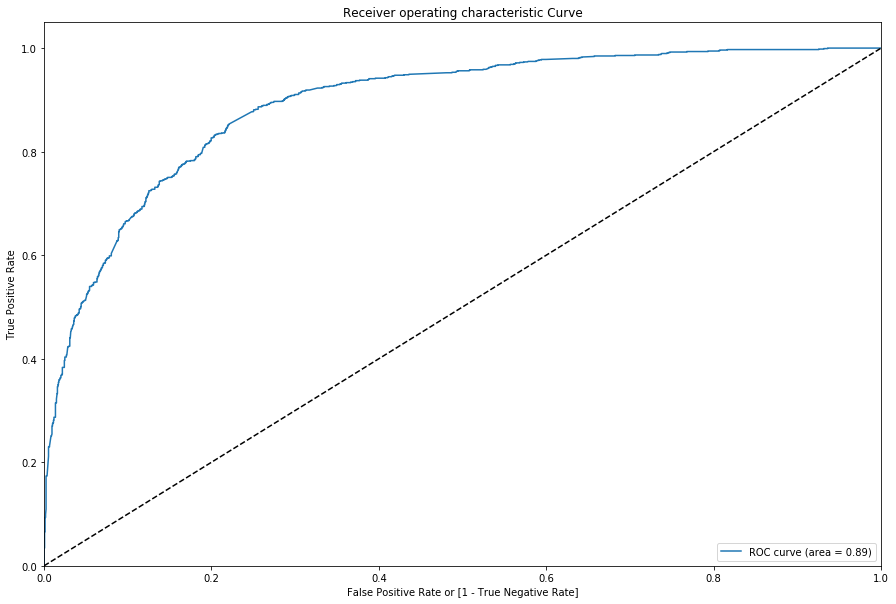

In [981]:
draw_roc(test_stat['conv_actual'], test_stat['conv_prob'], savefig='roc_default') 

### Choosing the right value for probability cutoff

In [982]:
# To verify the model goodness, we need to run it over a range of probability cut-off's 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    #print ('Calculating for prob cutoff: ',i)
    #test_stat['pcoff'] = i
    test_stat[i]= test_stat['conv_prob'].map(lambda x: 1 if x > i else 0)

In [983]:
print(test_stat.shape)
test_stat.head()

(2742, 14)


,Lead Number,conv_actual,conv_pred,conv_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5080,611126,1,1,0.69,1,1,1,1,1,1,1,0,0,0
1893,641248,0,0,0.07,1,0,0,0,0,0,0,0,0,0
5432,608255,1,0,0.09,1,0,0,0,0,0,0,0,0,0
3549,626477,1,1,0.98,1,1,1,1,1,1,1,1,1,1
8231,587079,0,0,0.36,1,1,1,1,0,0,0,0,0,0


In [984]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci', 'precision','recall'])
#from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:    
    cm1 = metrics.confusion_matrix(test_stat['conv_actual'], test_stat[i])
    #print('ConfusionMatrix: \n', cm1)
    total1=sum(sum(cm1))
    #print('total - ',total1)
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision = cm1[1,1]/(cm1[1,1]+ cm1[0,1])
    recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    
    print('accuracy: {}, Sensi: {}, Speci: {}'.format(accuracy,sensi, speci))
    #print('Lead# {}, Accuracy: {}, Sensi: {}, Speci:{}'.format(y_pred_stat['Lead Number'],accuracy, sensi, speci))
    cutoff_df.loc[i] =[i,accuracy,sensi,speci, precision, recall]


accuracy: 0.3825674690007294, Sensi: 1.0, Speci: 0.0
accuracy: 0.6043034281546317, Sensi: 0.9799809342230696, Speci: 0.37152982870643825
accuracy: 0.7571115973741794, Sensi: 0.9275500476644424, Speci: 0.6515062020082694
accuracy: 0.7961342086068564, Sensi: 0.886558627264061, Speci: 0.7401063201417601
accuracy: 0.8110867979576951, Sensi: 0.778836987607245, Speci: 0.8310691080921441
accuracy: 0.8140043763676149, Sensi: 0.7102001906577693, Speci: 0.8783225044300059
accuracy: 0.8059810357403355, Sensi: 0.6367969494756911, Speci: 0.9108092144122859
accuracy: 0.7888402625820569, Sensi: 0.5433746425166825, Speci: 0.9409332545776727
accuracy: 0.7731582786287381, Sensi: 0.46234509056244044, Speci: 0.9657412876550502
accuracy: 0.7202771699489424, Sensi: 0.29075309818875117, Speci: 0.9864146485528648


In [985]:
cutoff_df

,prob,accuracy,sensi,speci,precision,recall
0.00,0.00,0.38,1.00,0.00,0.38,1.00
0.10,0.10,0.60,0.98,0.37,0.49,0.98
0.20,0.20,0.76,0.93,0.65,0.62,0.93
0.30,0.30,0.80,0.89,0.74,0.68,0.89
0.40,0.40,0.81,0.78,0.83,0.74,0.78
0.50,0.50,0.81,0.71,0.88,0.78,0.71
0.60,0.60,0.81,0.64,0.91,0.82,0.64
0.70,0.70,0.79,0.54,0.94,0.85,0.54
0.80,0.80,0.77,0.46,0.97,0.89,0.46
0.90,0.90,0.72,0.29,0.99,0.93,0.29


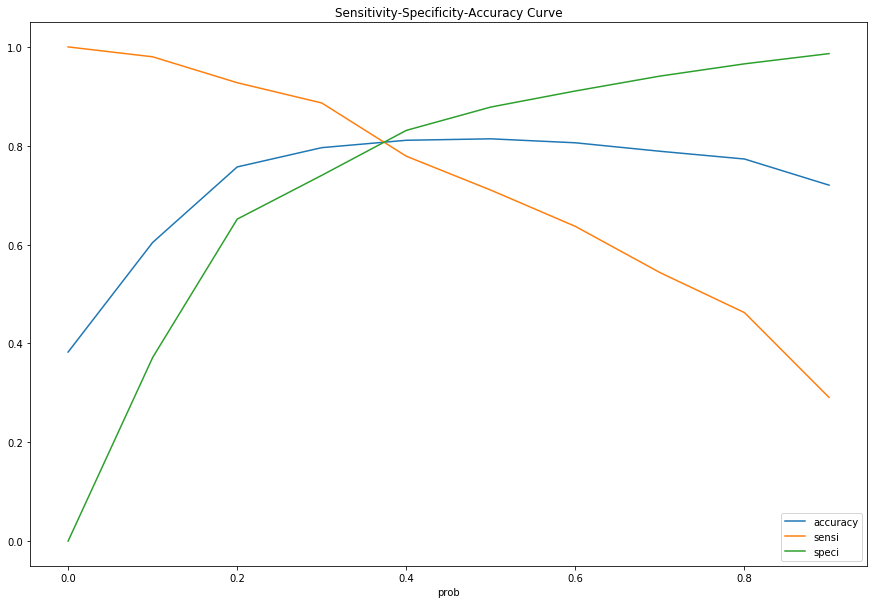

In [986]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], title='Sensitivity-Specificity-Accuracy Curve', figsize=(15,10))
plt.savefig('sensi_speci.png')
plt.show()

__From the plot above, it looks like sensitvity and specificity instersect around a probability threshold of 0.30, resulting in an accuracy of ~90%__

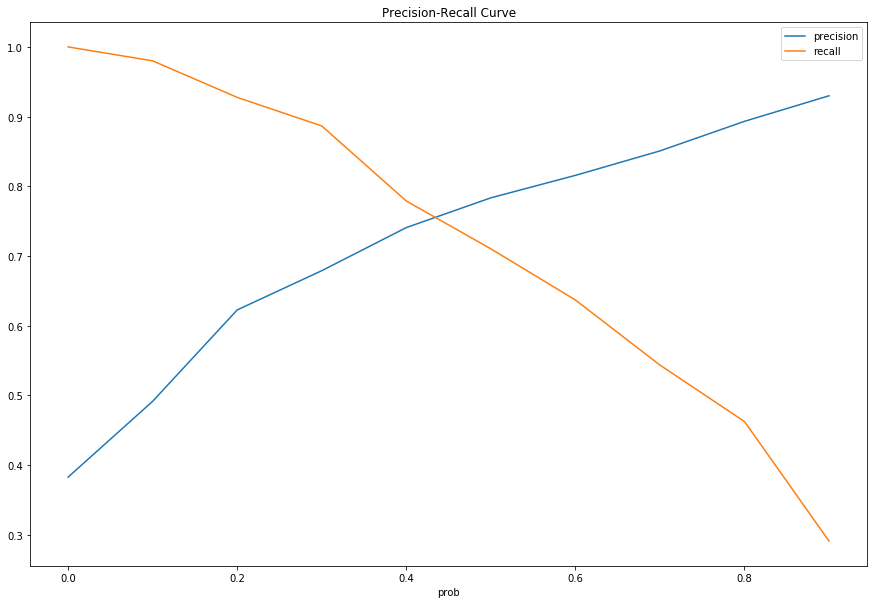

In [987]:
# Similar to above, plot a Precision - Recall curve
cutoff_df.plot.line(x='prob', y=['precision', 'recall'],title='Precision-Recall Curve' ,figsize=(15,10))
plt.savefig('precision_recall.png')
plt.show()

__From the 2 plots and table above, we see that if the cut-off probability is pinned at 0.6, we get a precision of 82% with an accuracy of 81%__  

In [988]:
# Get the lead details for cut-off of 0.6
test_stat[test_stat[0.6]==1][['Lead Number','conv_prob','conv_actual',0.6]].head()

,Lead Number,conv_prob,conv_actual,0.6
5080,611126,0.69,1,1
3549,626477,0.98,1,1
943,650291,0.97,1,1
2246,637929,0.68,1,1
1883,641311,0.88,1,1


In [989]:
#draw_roc(test_stat[test_stat['conv_prob']>=0.6]['conv_actual'], test_stat[test_stat['conv_prob']>=0.6]['conv_prob'], savefig='roc_06Coff') 

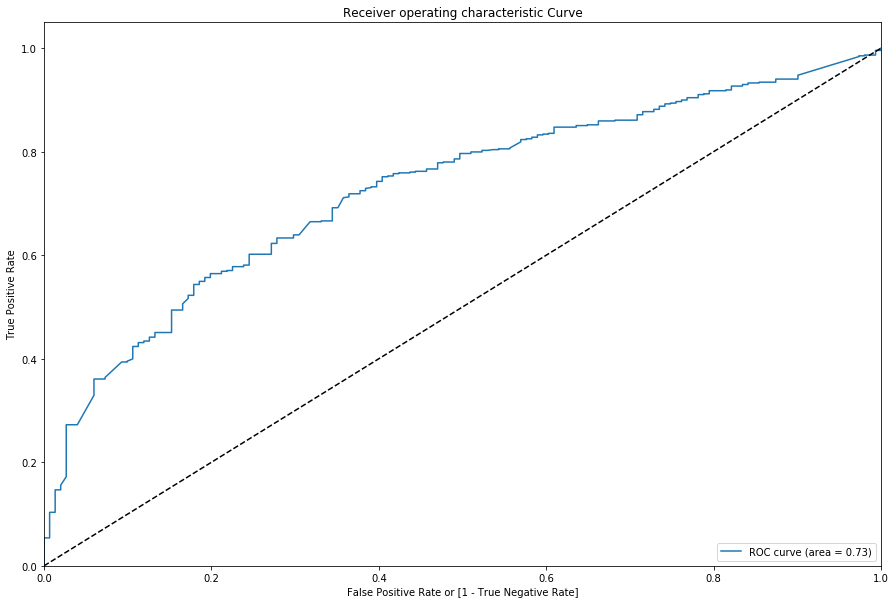

In [990]:
draw_roc(test_stat[test_stat[0.6]==1]['conv_actual'], test_stat[test_stat[0.6]==1]['conv_prob'], savefig='roc_06Coff') 

__The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0__

In [1004]:
#Calculate F-Score
from sklearn.metrics import f1_score
f1_score(test_stat[test_stat['conv_prob']>=0.6]['conv_actual'], test_stat[test_stat['conv_prob']>=0.6]['conv_pred'])

0.898453261600538

__We get an F-score of 89.85%__ 

In [991]:
# Calculate the lead conversion score, i.e. conv probability * 100 
test_stat['lead_score'] = test_stat[test_stat[0.6]==1]['conv_prob']*100

In [992]:
#Display details of the lead number in descending order of Lead Conversion score
#test_stat[test_stat[0.6]==1].sort_values(by='lead_score', ascending=False)

In [993]:
#Display details of the lead number in descending order of Lead Conversion score
test_stat[test_stat['conv_prob']>=0.60]

,Lead Number,conv_actual,conv_pred,conv_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,lead_score
5080,611126,1,1,0.69,1,1,1,1,1,1,1,0,0,0,69.08
3549,626477,1,1,0.98,1,1,1,1,1,1,1,1,1,1,98.27
943,650291,1,1,0.97,1,1,1,1,1,1,1,1,1,1,96.87
2246,637929,1,1,0.68,1,1,1,1,1,1,1,0,0,0,67.93
1883,641311,1,1,0.88,1,1,1,1,1,1,1,1,1,0,87.51
6325,601378,1,1,0.84,1,1,1,1,1,1,1,1,1,0,83.88
8314,586364,1,1,0.79,1,1,1,1,1,1,1,1,0,0,78.82
4531,616206,1,1,0.91,1,1,1,1,1,1,1,1,1,1,91.45
2498,635757,1,1,0.65,1,1,1,1,1,1,1,0,0,0,65.44
6255,601815,1,1,0.61,1,1,1,1,1,1,1,0,0,0,61.29
